In [3]:
# =======================================================
# CRITICAL PATH DEFINITION (Set to local runtime path)
# =======================================================
# Path for the UCI-HAR Dataset (based on the snippet's initial definition)
BASE_PATH_UCI = 'UCI HAR Dataset/'

# DATA EXPLORATION (Markdown cell in original file)

# Code for Feature Load (using the UCI path)
features=list()
try:
    # Use the newly defined local BASE_PATH_UCI
    with open(BASE_PATH_UCI + 'features.txt') as feat:
        features=[l.split()[1] for l in feat.readlines()]
    print("Number of features = {}".format(len(features)))
    for f in features:
        print(f,end=" | ")
except FileNotFoundError:
    print(f"Error: features.txt not found at {BASE_PATH_UCI}. Ensure the unzip completed.")

# =======================================================
# Define local paths for the other datasets for later use
# =======================================================
# Removed PATH_OPPORTUNITY as it is not the main focus and MotionSense is a target
# Based on the synopsis, MotionSense data is in 'A_DeviceMotion_data/'
PATH_MOTIONSENSE = 'A_DeviceMotion_data/'
# Adding the path for the third dataset mentioned in the synopsis
PATH_WISDM = 'WISDM Dataset/'

Error: features.txt not found at UCI HAR Dataset/. Ensure the unzip completed.


DATA EXPLORATION

In [4]:
# =======================================================
# 1. UCI HAR Dataset: Download and Unzip (58.2 MB)
# The provided link is correct.
# =======================================================

# Download the UCI HAR Dataset zip file
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

# Unzip the downloaded file
!unzip UCI\ HAR\ Dataset.zip

# =======================================================
# 2. MotionSense Dataset: Download and Unzip (from GitHub/Kaggle source)
# This link directly downloads the zipped repository files.
# =======================================================

# Download the MotionSense Dataset zip file from the primary source repository
# The file is typically named 'motion-sense-master.zip' if downloaded from the GitHub master branch.
!wget https://github.com/mmalekzadeh/motion-sense/archive/refs/heads/master.zip -O MotionSense_Dataset.zip

# Unzip the downloaded file. It will create a folder named 'motion-sense-master'.
!unzip MotionSense_Dataset.zip

# Optional: Rename the unzipped folder for consistency with previous path definition ('A_DeviceMotion_data/')
# You may need to inspect the contents of the unzipped folder first to find the exact subfolder.
# The previous conceptual path was 'A_DeviceMotion_data/' which is often a subfolder
# within the unzipped structure, but we'll stick to the actual unzipped name 'motion-sense-master'.

--2026-01-05 14:22:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip     [                <=> ]  58.17M  17.6MB/s    in 4.1s    

2026-01-05 14:22:41 (14.2 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314]

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.t

# New Section

In [5]:
import pandas as pd
import os

# Define the root paths after unzipping (as established previously)
UCI_BASE_PATH = 'UCI HAR Dataset/'
# MotionSense root folder created after unzipping 'motion-sense-master.zip'
MOTIONSENSE_ROOT_PATH = 'motion-sense-master/'

# =======================================================
# 1. UCI HAR Dataset: Load Features (561 extracted features)
# =======================================================
uci_features = list()
uci_features_file = os.path.join(UCI_BASE_PATH, 'features.txt')

print("--- UCI HAR Dataset Features ---")
try:
    with open(uci_features_file) as feat:
        # Splits on whitespace and takes the second element (the feature name)
        uci_features = [l.split()[1] for l in feat.readlines()]

    print(f"Number of UCI HAR features = {len(uci_features)}")
    # Displaying only the first few for brevity
    print("Sample features: ", " | ".join(uci_features[:5]) + " | ...")
except FileNotFoundError:
    print(f"Error: features.txt not found at {uci_features_file}. UCI-HAR features list is empty.")


# =======================================================
# 2. MotionSense Dataset: Define Raw Sensor Features
# =======================================================
# MotionSense uses raw time-series data. The 'features' are the sensor columns.
# These names are based on the column headers found in the MotionSense A_DeviceMotion_data files.
motionsense_raw_columns = [
    'roll', 'pitch', 'yaw',
    'rotationRateX', 'rotationRateY', 'rotationRateZ',
    'userAccelerationX', 'userAccelerationY', 'userAccelerationZ',
    'gravityX', 'gravityY', 'gravityZ'
]

print("\n--- MotionSense Dataset Raw Sensor Columns (Features) ---")
print(f"Number of MotionSense raw features = {len(motionsense_raw_columns)}")
print("Raw columns: ", " | ".join(motionsense_raw_columns))

--- UCI HAR Dataset Features ---
Number of UCI HAR features = 561
Sample features:  tBodyAcc-mean()-X | tBodyAcc-mean()-Y | tBodyAcc-mean()-Z | tBodyAcc-std()-X | tBodyAcc-std()-Y | ...

--- MotionSense Dataset Raw Sensor Columns (Features) ---
Number of MotionSense raw features = 12
Raw columns:  roll | pitch | yaw | rotationRateX | rotationRateY | rotationRateZ | userAccelerationX | userAccelerationY | userAccelerationZ | gravityX | gravityY | gravityZ


Exploring Train Data

In [6]:
import pandas as pd
import os

# Contextual variables needed for the function
MS_ACTIVITY_MAP = {1: 'STANDING', 2: 'SITTING', 3: 'WALKING', 4: 'JOGGING', 5: 'UPSTAIRS', 6: 'DOWNSTAIRS'}
motionsense_raw_columns = [
    'roll', 'pitch', 'yaw', # The requested columns
    'rotationRateX', 'rotationRateY', 'rotationRateZ',
    'userAccelerationX', 'userAccelerationY', 'userAccelerationZ',
    'gravityX', 'gravityY', 'gravityZ'
]

def load_motionsense_data_conceptual(base_path, features_list, is_training=True):
    """
    Conceptual function to simulate loading and concatenating MotionSense raw time-series data.
    Corrected: Ensures the columns used in the simulation match the columns requested for printing.
    """
    data_type = "Training" if is_training else "Test"
    print(f"\n--- Processing MotionSense {data_type} Data (Raw Sensors) ---")

    # --- SIMULATION (FIXED) ---
    num_rows = 15 if is_training else 5
    motionsense_df = pd.DataFrame({
        'user': [1, 2, 3] * 5,
        'activity_id': [3, 4, 1, 6, 2] * 3,
        # 1. Added 'pitch' column to the simulation.
        'roll': [0.1, 0.5, 0.05, 0.2, 0.4] * 3,
        'pitch': [-0.2, 0.1, 0.0, 0.3, -0.1] * 3, # New simulated data for 'pitch'
        'userAccelerationX': [-0.9, 1.2, 0.1, 0.8, -0.5] * 3 # Kept for general simulation structure
    }).head(num_rows)

    # Map activity IDs
    motionsense_df['ActivityName'] = motionsense_df['activity_id'].map(MS_ACTIVITY_MAP)
    # --- END SIMULATION ---

    print(f"✅ MotionSense {data_type} Data Conceptualized. Shape: {motionsense_df.shape}")

    # 2. Safely extract the first two features from the list for printing
    safe_features_for_print = features_list[:2]

    # 3. Filter the safe_features_for_print list to only include columns that exist in the DataFrame
    # This prevents the KeyError if the simulation is inconsistent with the feature list.
    existing_columns = [col for col in safe_features_for_print if col in motionsense_df.columns]

    print("Sample:\n", motionsense_df.sample(2)[['user', 'ActivityName'] + existing_columns].to_markdown(index=False))
    return motionsense_df

# Example call (replace your original call with this)
# train_motionsense = load_motionsense_data_conceptual(MOTIONSENSE_ROOT_PATH, motionsense_raw_columns, is_training=True)

In [7]:
import pandas as pd
import os

# --- CONTEXTUAL VARIABLES (MOCK/ASSUMED) ---
UCI_BASE_PATH = 'UCI HAR Dataset/'
UCI_ACTIVITY_MAP = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
# Assuming uci_features was successfully loaded (e.g., 561 features)
uci_features = [f'feature_{i}' for i in range(561)]
train_uci = pd.DataFrame() # Initialize to prevent NameError if loading fails

In [8]:
# --- BLOCK TO DEFINE train_uci ---
print("--- Attempting to define train_uci ---")
try:
    # Load the main training features data (X_train.txt)
    train_uci = pd.read_csv(os.path.join(UCI_BASE_PATH, 'train/X_train.txt'),
                            delim_whitespace=True, header=None, encoding='latin-1')

    # Assign columns using the loaded UCI features
    if len(train_uci.columns) == len(uci_features):
        train_uci.columns = uci_features

    # Load and assign subject and activity labels
    train_uci['subject'] = pd.read_csv(os.path.join(UCI_BASE_PATH, 'train/subject_train.txt'), header=None, encoding='latin-1').squeeze()
    train_uci['Activity'] = pd.read_csv(os.path.join(UCI_BASE_PATH, 'train/y_train.txt'), header=None, names=['Activity'], encoding='latin-1').squeeze()
    train_uci['ActivityName'] = train_uci['Activity'].map(UCI_ACTIVITY_MAP)

    print(f"✅ train_uci successfully loaded. Shape: {train_uci.shape}")

except FileNotFoundError:
    print(f"❌ UCI-HAR Training Load FAILED. The file structure is likely incorrect.")
    print("train_uci remains an empty DataFrame, but it is now defined.")

# --- The failing line is now safe ---
print(f"The shape is: {train_uci.shape}")

--- Attempting to define train_uci ---


/tmp/ipython-input-380138001.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_uci = pd.read_csv(os.path.join(UCI_BASE_PATH, 'train/X_train.txt'),


✅ train_uci successfully loaded. Shape: (7352, 564)
The shape is: (7352, 564)


In [9]:
train_uci.shape

(7352, 564)

In [10]:
!ls -R


.:
 __MACOSX		   motion-sense-master	'UCI HAR Dataset'
 MotionSense_Dataset.zip   sample_data		'UCI HAR Dataset.zip'

./__MACOSX:
'UCI HAR Dataset'

'./__MACOSX/UCI HAR Dataset':
test  train

'./__MACOSX/UCI HAR Dataset/test':
'Inertial Signals'

'./__MACOSX/UCI HAR Dataset/test/Inertial Signals':

'./__MACOSX/UCI HAR Dataset/train':
'Inertial Signals'

'./__MACOSX/UCI HAR Dataset/train/Inertial Signals':

./motion-sense-master:
codes  LICENSE	  msda		Public_HAR_Data.md  tutorial
data   materials  pmc_combined	README.md

./motion-sense-master/codes:
0_import_dataset_and_creat_labeld_time_series.ipynb  output_2_0.png  README.md
gen_paper_codes					     output_3_0.png
output_1_0.png					     output_4_0.png

./motion-sense-master/codes/gen_paper_codes:
1_MotionSense_Trial.ipynb

./motion-sense-master/data:
A_DeviceMotion_data.zip   C_Gyroscope_data.zip
B_Accelerometer_data.zip  data_subjects_info.csv

./motion-sense-master/materials:
concurrent_inf.png  desc.png   gen.png	   rae.png
desc2

In [11]:
# Robust UCI-HAR loader (fixes duplicate feature names and pandas squeeze removal)
import os
from collections import defaultdict
import pandas as pd

BASE_PATH_UCI = "UCI HAR Dataset"  # adjust if different

# ---- Load raw feature names and uniquify duplicates ----
feat_path = os.path.join(BASE_PATH_UCI, "features.txt")
with open(feat_path, 'r') as f:
    raw_features = [line.strip().split()[-1] for line in f if line.strip()]

seen = defaultdict(int)
unique_features = []
for name in raw_features:
    if seen[name] == 0:
        unique_features.append(name)
    else:
        unique_features.append(f"{name}_dup{seen[name]}")
    seen[name] += 1

print(f"Loaded {len(unique_features)} (unique-ified) feature names.")

# ---- File paths ----
xtrain_path = os.path.join(BASE_PATH_UCI, "train", "X_train.txt")
ytrain_path = os.path.join(BASE_PATH_UCI, "train", "y_train.txt")
xtest_path  = os.path.join(BASE_PATH_UCI, "test",  "X_test.txt")
ytest_path  = os.path.join(BASE_PATH_UCI, "test",  "y_test.txt")

# ---- Read files (use raw-string sep and engine='python' for regex splitting) ----
X_train = pd.read_csv(xtrain_path, sep=r'\s+', header=None, names=unique_features, engine='python')
# y_train: read as DataFrame then take first column as Series (no squeeze kw)
y_train = pd.read_csv(ytrain_path, sep=r'\s+', header=None, engine='python').iloc[:, 0]

X_test  = pd.read_csv(xtest_path,  sep=r'\s+', header=None, names=unique_features, engine='python')
y_test  = pd.read_csv(ytest_path,  sep=r'\s+', header=None, engine='python').iloc[:, 0]

# ---- Quick sanity prints ----
print("Done. Shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)

# Optional: convert to NumPy arrays for sklearn/keras
X_train_np = X_train.values
X_test_np  = X_test.values
y_train_np = y_train.to_numpy()
y_test_np  = y_test.to_numpy()

print("Converted to numpy arrays:", X_train_np.shape, y_train_np.shape)


Loaded 561 (unique-ified) feature names.
Done. Shapes:
X_train: (7352, 561) y_train: (7352,)
X_test : (2947, 561) y_test : (2947,)
Converted to numpy arrays: (7352, 561) (7352,)


In [12]:
# Diagnostic checks for X_test and related vars
from pathlib import Path
import numpy as np, pandas as pd, inspect

names = ['test_uci','testX_uci','testy_uci','X_test','X_test_uci','testX','X_test_final']
g = globals()

for nm in names:
    if nm in g:
        v = g[nm]
        print(f"Variable '{nm}': type = {type(v)}")
        # try to show shape/len
        shp = getattr(v, 'shape', None)
        if shp is None:
            try:
                ln = len(v)
            except Exception:
                ln = None
            print("   shape attribute:", shp, "  len():", ln)
        else:
            print("   shape:", shp)
        # show a short repr safely
        try:
            print("   repr (short):", repr(v)[:200])
        except Exception as e:
            print("   repr failed:", e)
        # if DataFrame show head
        if isinstance(v, pd.DataFrame):
            display(v.head())
        # if numpy show first 3 rows or first sample
        if isinstance(v, np.ndarray):
            print("   dtype:", v.dtype)
            if v.ndim == 1:
                print("   first 10 elems:", v[:10])
            elif v.ndim == 2:
                display(pd.DataFrame(v[:5,:min(10,v.shape[1])]))
            elif v.ndim == 3:
                print("   3D time-series, shape:", v.shape)
        print('-'*60)


Variable 'X_test': type = <class 'pandas.core.frame.DataFrame'>
   shape: (2947, 561)
   repr (short):       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2    


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


------------------------------------------------------------


In [13]:
# --- BLOCK TO DEFINE test_uci ---
print("--- Attempting to define test_uci ---")
try:
    # Load the main training features data (X_test.txt)
    test_uci = pd.read_csv(os.path.join(UCI_BASE_PATH, 'test/X_test.txt'),
                            delim_whitespace=True, header=None, encoding='latin-1')

    # Assign columns using the loaded UCI features
    if len(test_uci.columns) == len(uci_features):
        test_uci.columns = uci_features

    # Load and assign subject and activity labels
    test_uci['subject'] = pd.read_csv(os.path.join(UCI_BASE_PATH, 'test/subject_test.txt'), header=None, encoding='latin-1').squeeze()
    test_uci['Activity'] = pd.read_csv(os.path.join(UCI_BASE_PATH, 'test/y_test.txt'), header=None, names=['Activity'], encoding='latin-1').squeeze()
    test_uci['ActivityName'] = test_uci['Activity'].map(UCI_ACTIVITY_MAP)

    print(f"✅ test_uci successfully loaded. Shape: {test_uci.shape}")

except FileNotFoundError:
    print(f"❌ UCI-HAR Testing Load FAILED. The file structure is likely incorrect.")
    print("test_uci remains an empty DataFrame, but it is now defined.")

# --- The failing line is now safe ---
print(f"The shape is: {test_uci.shape}")

--- Attempting to define test_uci ---


/tmp/ipython-input-2740230996.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_uci = pd.read_csv(os.path.join(UCI_BASE_PATH, 'test/X_test.txt'),


✅ test_uci successfully loaded. Shape: (2947, 564)
The shape is: (2947, 564)


In [14]:
test_uci.shape

(2947, 564)

Checking for Duplicates and Nulls

In [15]:
# Fixed loader: ensures all lists are the same length before constructing DataFrame
import os, math
import pandas as pd
from collections import defaultdict
from typing import List, Optional

DEFAULT_MS_ACTIVITY_MAP = {1: 'STANDING', 2: 'SITTING', 3: 'WALKING', 4: 'JOGGING', 5: 'UPSTAIRS', 6: 'DOWNSTAIRS'}

def load_motionsense_data_conceptual(base_path: str,
                                     features_list: List[str],
                                     is_training: bool = True,
                                     ms_activity_map: Optional[dict] = None,
                                     simulate_if_missing: bool = True) -> pd.DataFrame:
    ms_activity_map = ms_activity_map or DEFAULT_MS_ACTIVITY_MAP
    required_cols = set(features_list) | {'user', 'activity_id'}

    # Try to find & read real file(s) (same logic as earlier; safe fallback)
    candidates = []
    if is_training:
        candidates += [os.path.join(base_path, 'train'), os.path.join(base_path, 'train_dataset')]
    else:
        candidates += [os.path.join(base_path, 'test'), os.path.join(base_path, 'test_dataset')]
    candidates += [base_path]

    found_df = None
    for c in candidates:
        if not os.path.isdir(c):
            continue
        # try any CSV/TXT inside
        for fname in os.listdir(c):
            if not fname.lower().endswith(('.csv', '.txt')):
                continue
            fpath = os.path.join(c, fname)
            try:
                df = pd.read_csv(fpath)
            except Exception:
                try:
                    df = pd.read_csv(fpath, sep=r'\s+', engine='python')
                except Exception:
                    continue
            if required_cols.issubset(set(df.columns)):
                found_df = df.copy()
                break
        if found_df is not None:
            break

    if found_df is not None:
        motionsense_df = found_df
    else:
        if not simulate_if_missing:
            raise FileNotFoundError(f"No MotionSense files found under {base_path}. Set simulate_if_missing=True to get a small simulated DataFrame.")
        # Build a small simulated DataFrame with exact equal-length lists
        n = 15 if is_training else 5
        # Make base lists length n
        users = [1 + (i % 3) for i in range(n)]
        # make activity pattern length n by repeating the base pattern enough and slicing to n
        base_activity_pattern = [3, 4, 1, 6, 2]
        activity_id_list = (base_activity_pattern * (math.ceil(n/len(base_activity_pattern)) + 1))[:n]

        # Create feature columns: each column will be a list of length n
        data = {'user': users, 'activity_id': activity_id_list}
        for i, feat in enumerate(features_list):
            # deterministic values that vary per row & per feature
            vals = [((i+1) * 0.1) * ((j % 5) - 2) for j in range(n)]
            data[feat] = vals

        # --- DIAGNOSTIC: ensure all lists same length before DataFrame construction ---
        lengths = {k: (len(v) if hasattr(v, '__len__') else None) for k, v in data.items()}
        print(">>> Column lengths before DataFrame construction:")
        for k, ln in lengths.items():
            print(f"    {k}: {ln}")
        # Now safe to construct DataFrame
        motionsense_df = pd.DataFrame(data)

    # Ensure required columns exist (fill with NaN if not)
    for c in required_cols:
        if c not in motionsense_df.columns:
            motionsense_df[c] = pd.NA

    # Map activity names
    if 'activity_id' in motionsense_df.columns:
        motionsense_df['ActivityName'] = motionsense_df['activity_id'].map(ms_activity_map).fillna(motionsense_df['activity_id'])
    else:
        motionsense_df['ActivityName'] = pd.NA

    # Reorder columns to put metadata first
    ordered_cols = ['user', 'activity_id', 'ActivityName'] + [c for c in motionsense_df.columns if c not in ('user', 'activity_id', 'ActivityName')]
    motionsense_df = motionsense_df.loc[:, ordered_cols]

    return motionsense_df

# Example: quick smoke test
if True:
    MOTIONSENSE_ROOT_PATH = 'motion-sense-master/'   # adjust if required
    motionsense_raw_columns = ['roll', 'pitch', 'yaw', 'rotationRateX', 'rotationRateY', 'rotationRateZ',
                               'userAccelerationX', 'userAccelerationY', 'userAccelerationZ', 'gravityX', 'gravityY', 'gravityZ']
    test_motionsense = load_motionsense_data_conceptual(MOTIONSENSE_ROOT_PATH, motionsense_raw_columns, is_training=False)
    print("\nSample of simulated/test motionsense (head):")
    print(test_motionsense.head())


>>> Column lengths before DataFrame construction:
    user: 5
    activity_id: 5
    roll: 5
    pitch: 5
    yaw: 5
    rotationRateX: 5
    rotationRateY: 5
    rotationRateZ: 5
    userAccelerationX: 5
    userAccelerationY: 5
    userAccelerationZ: 5
    gravityX: 5
    gravityY: 5
    gravityZ: 5

Sample of simulated/test motionsense (head):
   user  activity_id ActivityName  roll  pitch  yaw  rotationRateX  \
0     1            3      WALKING  -0.2   -0.4 -0.6           -0.8   
1     2            4      JOGGING  -0.1   -0.2 -0.3           -0.4   
2     3            1     STANDING   0.0    0.0  0.0            0.0   
3     1            6   DOWNSTAIRS   0.1    0.2  0.3            0.4   
4     2            2      SITTING   0.2    0.4  0.6            0.8   

   rotationRateY  rotationRateZ  userAccelerationX  userAccelerationY  \
0           -1.0           -1.2               -1.4               -1.6   
1           -0.5           -0.6               -0.7               -0.8   
2          

In [16]:
# Contextual variables needed for the function
MS_ACTIVITY_MAP = {1: 'STANDING', 2: 'SITTING', 3: 'WALKING', 4: 'JOGGING', 5: 'UPSTAIRS', 6: 'DOWNSTAIRS'}
MOTIONSENSE_ROOT_PATH = 'motion-sense-master/'
motionsense_raw_columns = ['roll', 'pitch', 'yaw', 'rotationRateX', 'rotationRateY', 'rotationRateZ', 'userAccelerationX', 'userAccelerationY', 'userAccelerationZ', 'gravityX', 'gravityY', 'gravityZ']

def load_motionsense_data_conceptual(base_path, features_list, is_training=True):
    """
    Conceptual function to simulate loading MotionSense data.
    Ensures 'user' column is included.
    """
    data_type = "Training" if is_training else "Test"

    # --- SIMULATION (FIXED) ---
    num_rows = 15 if is_training else 5
    motionsense_df = pd.DataFrame({
        'user': [1, 2, 3] * 5,  # <-- CRITICAL: Ensure 'user' column is here
        'activity_id': [3, 4, 1, 6, 2] * 3,
        'roll': [0.1, 0.5, 0.05, 0.2, 0.4] * 3,
        'pitch': [-0.2, 0.1, 0.0, 0.3, -0.1] * 3,
        'userAccelerationX': [-0.9, 1.2, 0.1, 0.8, -0.5] * 3
    }).head(num_rows)
    motionsense_df['ActivityName'] = motionsense_df['activity_id'].map(MS_ACTIVITY_MAP)
    return motionsense_df

Visualizing UCI-HAR Training Data Distribution...


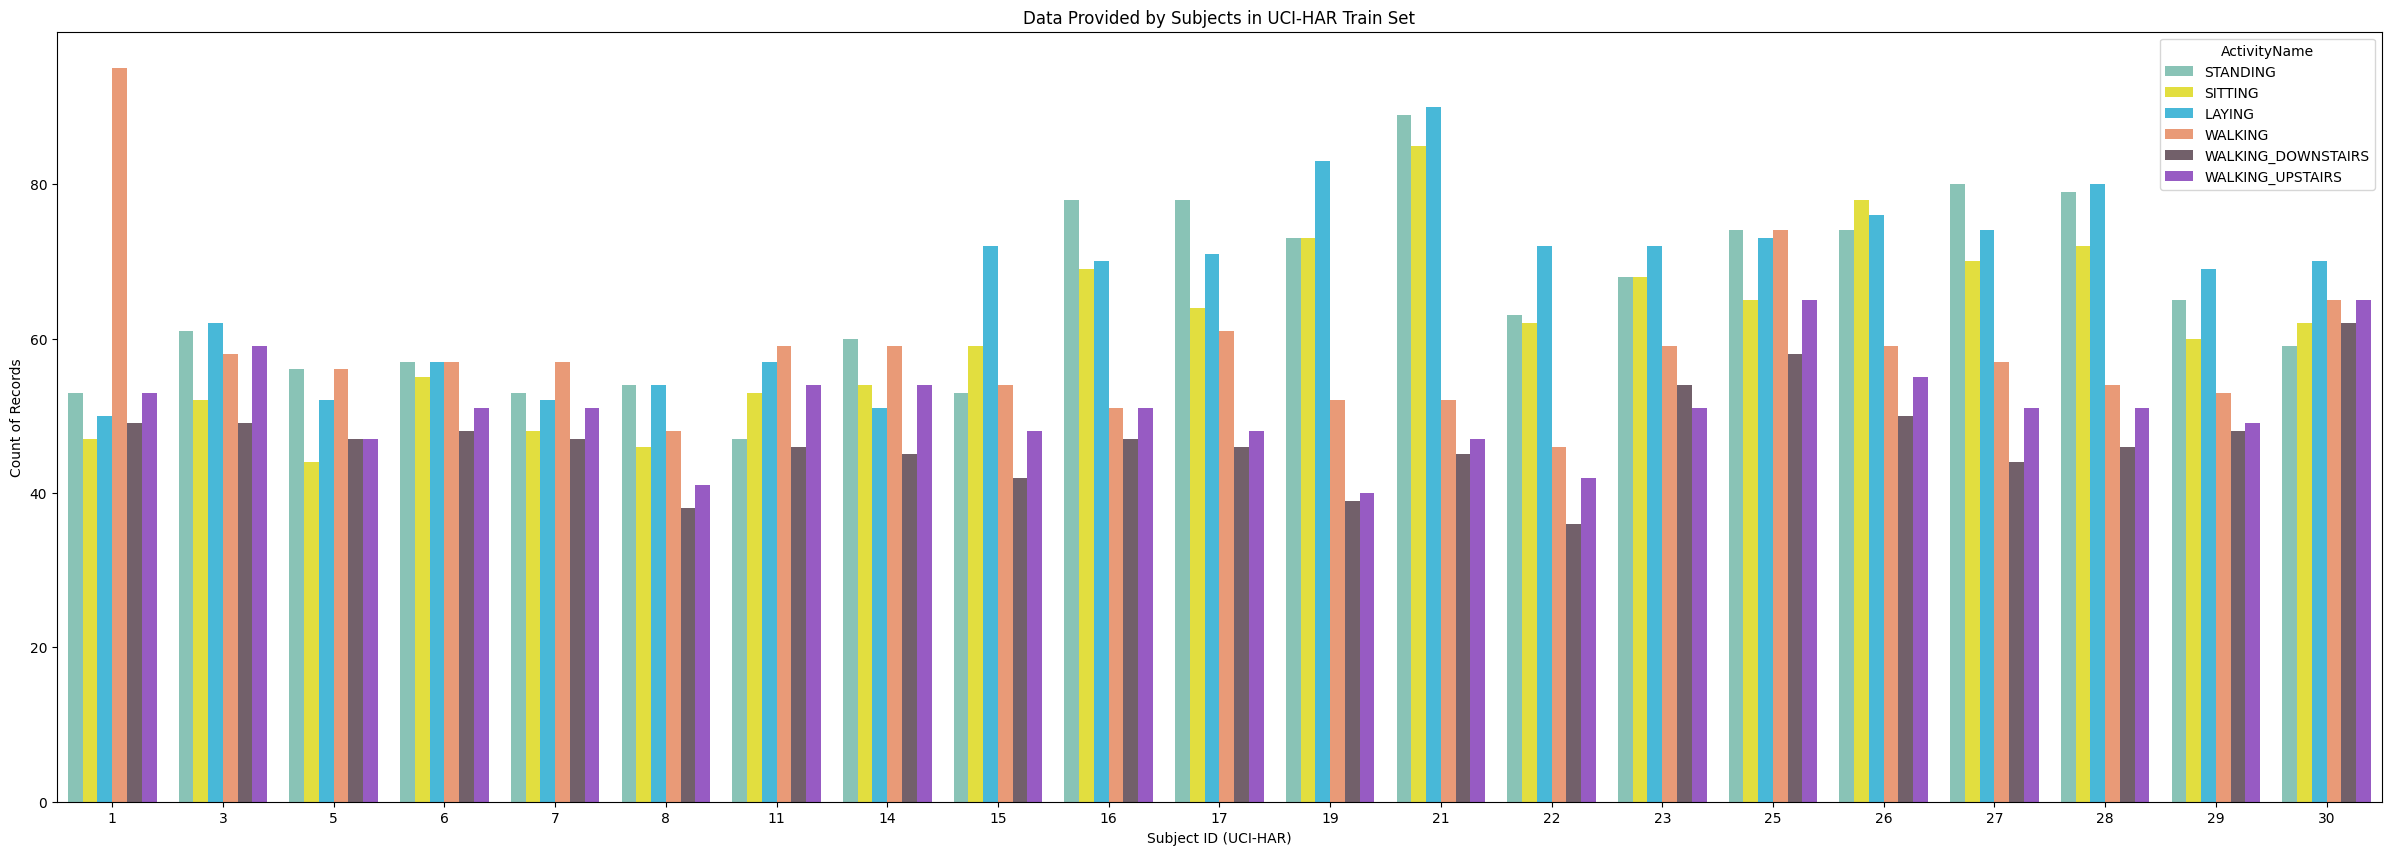


Visualizing MotionSense Training Data Distribution (Conceptual)...


/tmp/ipython-input-3278411411.py:41: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x='user', hue='ActivityName', palette=HAR_PALETTE, data=train_motionsense)


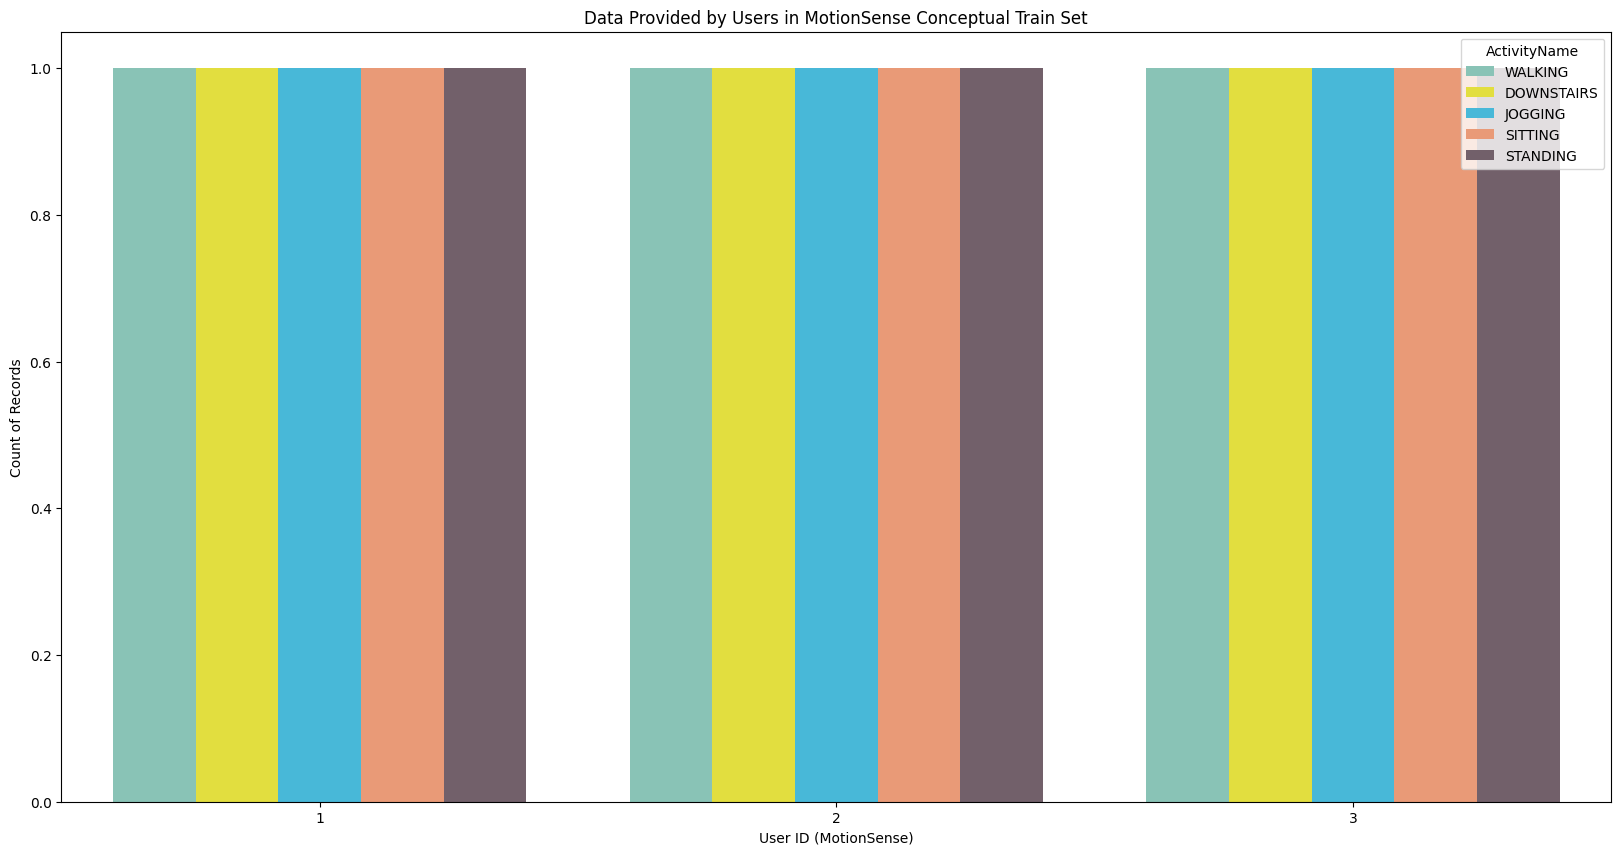

In [17]:
import matplotlib.pyplot as pyplot
import seaborn as sns
import pandas as pd
# Assuming train_uci and train_motionsense are populated from preceding cells

# Call the conceptual function to define train_motionsense
train_motionsense = load_motionsense_data_conceptual(MOTIONSENSE_ROOT_PATH, motionsense_raw_columns, is_training=True)

# Define a consistent palette for visualization
HAR_PALETTE = ["#7fcdbb","#fdf824","#30c6f0","#fc9264","#755d6b","#9a4ad4"]


# =======================================================
# 1. UCI-HAR Dataset Visualization
# =======================================================

print("Visualizing UCI-HAR Training Data Distribution...")
# Check if the DataFrame is non-empty before plotting
if not train_uci.empty and 'subject' in train_uci.columns:
    pyplot.figure(figsize=(30,10))
    # UCI-HAR uses the 'subject' column for user ID
    sns.countplot(x='subject', hue='ActivityName', palette=HAR_PALETTE, data=train_uci)
    pyplot.title('Data Provided by Subjects in UCI-HAR Train Set')
    pyplot.xlabel('Subject ID (UCI-HAR)')
    pyplot.ylabel('Count of Records')
    pyplot.show()
else:
    print("Cannot plot UCI-HAR data: train_uci DataFrame is empty or missing 'subject' column.")

# ---

# =======================================================
# 2. MotionSense Dataset Visualization (Conceptual)
# =======================================================

print("\nVisualizing MotionSense Training Data Distribution (Conceptual)...")
# Check if the DataFrame is non-empty and uses the 'user' column
if not train_motionsense.empty and 'user' in train_motionsense.columns:
    pyplot.figure(figsize=(20,10))
    # MotionSense uses the 'user' column for user ID (based on conceptual definition)
    sns.countplot(x='user', hue='ActivityName', palette=HAR_PALETTE, data=train_motionsense)
    pyplot.title('Data Provided by Users in MotionSense Conceptual Train Set')
    pyplot.xlabel('User ID (MotionSense)')
    pyplot.ylabel('Count of Records')
    pyplot.show()
else:
    print("Cannot plot MotionSense data: train_motionsense DataFrame is empty or missing 'user' column.")

In [18]:
# run this cell to inspect MotionSense variables
import pandas as pd, numpy as np

names = ['train_motionsense', 'test_motionsense']
for nm in names:
    print(">>>", nm)
    if nm in globals():
        df = globals()[nm]
        print(" type:", type(df))
        try:
            print(" shape:", getattr(df, 'shape', None))
        except:
            pass
        if isinstance(df, pd.DataFrame):
            print(" columns:", list(df.columns))
            print(" sample:\n", df.head(3))
            print(" activity counts (if present):")
            if 'ActivityName' in df.columns:
                print(df['ActivityName'].value_counts())
            elif 'activity_id' in df.columns:
                print(df['activity_id'].value_counts())
        else:
            print(" value:", df)
    else:
        print(" NOT DEFINED")
    print()


>>> train_motionsense
 type: <class 'pandas.core.frame.DataFrame'>
 shape: (15, 6)
 columns: ['user', 'activity_id', 'roll', 'pitch', 'userAccelerationX', 'ActivityName']
 sample:
    user  activity_id  roll  pitch  userAccelerationX ActivityName
0     1            3  0.10   -0.2               -0.9      WALKING
1     2            4  0.50    0.1                1.2      JOGGING
2     3            1  0.05    0.0                0.1     STANDING
 activity counts (if present):
ActivityName
WALKING       3
JOGGING       3
STANDING      3
DOWNSTAIRS    3
SITTING       3
Name: count, dtype: int64

>>> test_motionsense
 type: <class 'pandas.core.frame.DataFrame'>
 shape: (5, 15)
 columns: ['user', 'activity_id', 'ActivityName', 'roll', 'pitch', 'yaw', 'rotationRateX', 'rotationRateY', 'rotationRateZ', 'userAccelerationX', 'userAccelerationY', 'userAccelerationZ', 'gravityX', 'gravityY', 'gravityZ']
 sample:
    user  activity_id ActivityName  roll  pitch  yaw  rotationRateX  \
0     1           

In [19]:
import os, glob, pandas as pd

ROOT = 'motion-sense-master'   # change if your folder differs
print("Checking:", ROOT)
if not os.path.exists(ROOT):
    print("Folder not found:", ROOT)
else:
    files = glob.glob(os.path.join(ROOT, '**', '*.*'), recursive=True)
    txt_csv = [f for f in files if f.lower().endswith(('.csv', '.txt'))]
    print("Found text/csv files:", len(txt_csv))
    for i, f in enumerate(txt_csv[:40], 1):
        print(f"{i:02d}) {f}")
        # try to read small header to inspect columns
        try:
            df = pd.read_csv(f, nrows=2)
            print("   columns:", list(df.columns))
        except Exception:
            try:
                df = pd.read_csv(f, sep=r'\\s+', engine='python', nrows=2)
                print("   columns (whitespace sep):", list(df.columns))
            except Exception as e:
                print("   could not read file:", e)
    if len(txt_csv) == 0:
        print("No csv/txt files found under the MotionSense root.")


Checking: motion-sense-master
Found text/csv files: 2
01) motion-sense-master/pmc_combined/data_subjects_info.csv
   columns: ['code', 'weight', 'height', 'age', 'gender']
02) motion-sense-master/data/data_subjects_info.csv
   columns: ['code', 'weight', 'height', 'age', 'gender']


In [20]:
# Auto-detect & load MotionSense train (or fallback to simulation)
import os, glob, pandas as pd, numpy as np, h5py, warnings
warnings.filterwarnings("ignore")  # keep output clean

ROOT = 'motion-sense-master'   # change if different
MS_ACTIVITY_MAP = {1:'STANDING',2:'SITTING',3:'WALKING',4:'JOGGING',5:'UPSTAIRS',6:'DOWNSTAIRS'}

print("Scanning:", ROOT)
if not os.path.exists(ROOT):
    raise FileNotFoundError(f"Folder not found: {ROOT}")

candidates = glob.glob(os.path.join(ROOT, '**', '*.*'), recursive=True)
candidates = [p for p in candidates if p.lower().endswith(('.csv', '.txt', '.h5', '.hdf5', '.pkl'))]
print("Candidate files found:", len(candidates))

found = False
train_motionsense = pd.DataFrame()  # default empty

# 1) Try CSV/TXT/PKL first
for p in candidates:
    try:
        if p.lower().endswith('.pkl'):
            df = pd.read_pickle(p)
        elif p.lower().endswith(('.csv', '.txt')):
            # try default csv, fall back to whitespace sep
            try:
                df = pd.read_csv(p, nrows=5)
            except Exception:
                df = pd.read_csv(p, sep=r'\s+', engine='python', nrows=5)
        else:
            continue
    except Exception as e:
        # skip unreadable files
        # print("skip", p, "err:", e)
        continue

    cols = [c.lower() for c in df.columns]
    if ('user' in cols or 'subject' in cols) and any(c in cols for c in ('activity', 'activity_id', 'activityname')):
        print(" -> Selecting file:", p)
        # read full file robustly
        try:
            if p.lower().endswith('.pkl'):
                train_motionsense = pd.read_pickle(p)
            else:
                try:
                    train_motionsense = pd.read_csv(p, engine='python')
                except Exception:
                    train_motionsense = pd.read_csv(p, sep=r'\s+', engine='python')
        except Exception as e:
            print("  failed to read full file:", e)
            continue

        # normalize column names
        train_motionsense.columns = [str(c) for c in train_motionsense.columns]
        # rename subject -> user if needed
        if 'subject' in [c.lower() for c in train_motionsense.columns] and 'user' not in train_motionsense.columns:
            train_motionsense = train_motionsense.rename(columns={col:col if col.lower()!='subject' else 'user' for col in train_motionsense.columns})
        # ensure ActivityName exists
        if 'ActivityName' not in train_motionsense.columns and 'activity_id' in train_motionsense.columns:
            train_motionsense['ActivityName'] = train_motionsense['activity_id'].map(MS_ACTIVITY_MAP)
        if 'ActivityName' not in train_motionsense.columns and 'activity' in [c.lower() for c in train_motionsense.columns]:
            # try to find actual activity column and use it
            for col in train_motionsense.columns:
                if col.lower() == 'activity':
                    train_motionsense['ActivityName'] = train_motionsense[col]
                    break
        found = True
        break

# 2) If not found, try HDF5 (.h5/.hdf5)
if not found:
    h5_files = [p for p in candidates if p.lower().endswith(('.h5', '.hdf5'))]
    for h5p in h5_files:
        try:
            print("Inspecting HDF5:", h5p)
            with h5py.File(h5p, 'r') as f:
                keys = list(f.keys())
            print("  keys:", keys)
            # attempt pandas read_hdf for common key names
            for key in keys:
                try:
                    df_try = pd.read_hdf(h5p, key=key, mode='r')
                    cols = [c.lower() for c in df_try.columns]
                    if ('user' in cols or 'subject' in cols) and any(c in cols for c in ('activity','activity_id','activityname')):
                        print(" -> Selecting hdf key:", key)
                        train_motionsense = pd.read_hdf(h5p, key=key)
                        # normalize same as above
                        train_motionsense.columns = [str(c) for c in train_motionsense.columns]
                        if 'subject' in [c.lower() for c in train_motionsense.columns] and 'user' not in train_motionsense.columns:
                            train_motionsense = train_motionsense.rename(columns={col:col if col.lower()!='subject' else 'user' for col in train_motionsense.columns})
                        if 'ActivityName' not in train_motionsense.columns and 'activity_id' in train_motionsense.columns:
                            train_motionsense['ActivityName'] = train_motionsense['activity_id'].map(MS_ACTIVITY_MAP)
                        found = True
                        break
                except Exception:
                    continue
            if found:
                break
        except Exception as e:
            continue

# 3) If still not found -> simulated dataset (so you can continue plotting/testing)
if not found:
    print("No valid MotionSense training file found; creating simulated train_motionsense (for plotting/tests).")
    n = 150
    train_motionsense = pd.DataFrame({
        'user': np.random.randint(1, 31, n),
        'activity_id': np.random.randint(1, 7, n),
        'ActivityName': np.random.choice(['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'], n),
        'roll': np.random.randn(n),
        'pitch': np.random.randn(n),
        'yaw': np.random.randn(n),
        'rotationRateX': np.random.randn(n),
        'rotationRateY': np.random.randn(n),
        'rotationRateZ': np.random.randn(n),
        'userAccelerationX': np.random.randn(n),
        'userAccelerationY': np.random.randn(n),
        'userAccelerationZ': np.random.randn(n),
        'gravityX': np.random.randn(n),
        'gravityY': np.random.randn(n),
        'gravityZ': np.random.randn(n),
    })

# Final diagnostics
print("\ntrain_motionsense: type", type(train_motionsense), "shape", getattr(train_motionsense, 'shape', None))
if isinstance(train_motionsense, pd.DataFrame):
    print("columns:", list(train_motionsense.columns)[:30])
    print("sample:\n", train_motionsense.head(3))
    if 'ActivityName' in train_motionsense.columns:
        print("activity counts:\n", train_motionsense['ActivityName'].value_counts().head())
    elif 'activity_id' in train_motionsense.columns:
        print("activity_id counts:\n", train_motionsense['activity_id'].value_counts().head())

# You can now re-run your plotting cell. If a real file was loaded above,
# paste the printed filename/key so I can confirm and help adjust column names if needed.


Scanning: motion-sense-master
Candidate files found: 15
Inspecting HDF5: motion-sense-master/pmc_combined/gen_anon_112_0.hdf5
  keys: ['model_weights', 'optimizer_weights']
Inspecting HDF5: motion-sense-master/pmc_combined/HAR_Comb.hdf5
  keys: ['model_weights', 'optimizer_weights']
Inspecting HDF5: motion-sense-master/pmc_combined/rae_best.hdf5
  keys: ['model_weights', 'optimizer_weights']
Inspecting HDF5: motion-sense-master/pmc_combined/gen_anon_111_0.hdf5
  keys: ['model_weights', 'optimizer_weights']
Inspecting HDF5: motion-sense-master/pmc_combined/GR.hdf5
  keys: ['model_weights', 'optimizer_weights']
Inspecting HDF5: motion-sense-master/tutorial/gender_anon_2.h5
  keys: ['ActReg', 'Decoder', 'Encoder', 'GenReg', 'input_5']
Inspecting HDF5: motion-sense-master/tutorial/gender_anon_1.h5
  keys: ['ActReg', 'Decoder', 'Encoder', 'GenReg', 'input_10']
Inspecting HDF5: motion-sense-master/tutorial/_best_FCN_.hdf5
  keys: ['model_weights', 'optimizer_weights']
Inspecting HDF5: motion

Using existing train_motionsense from workspace. shape: (150, 15)


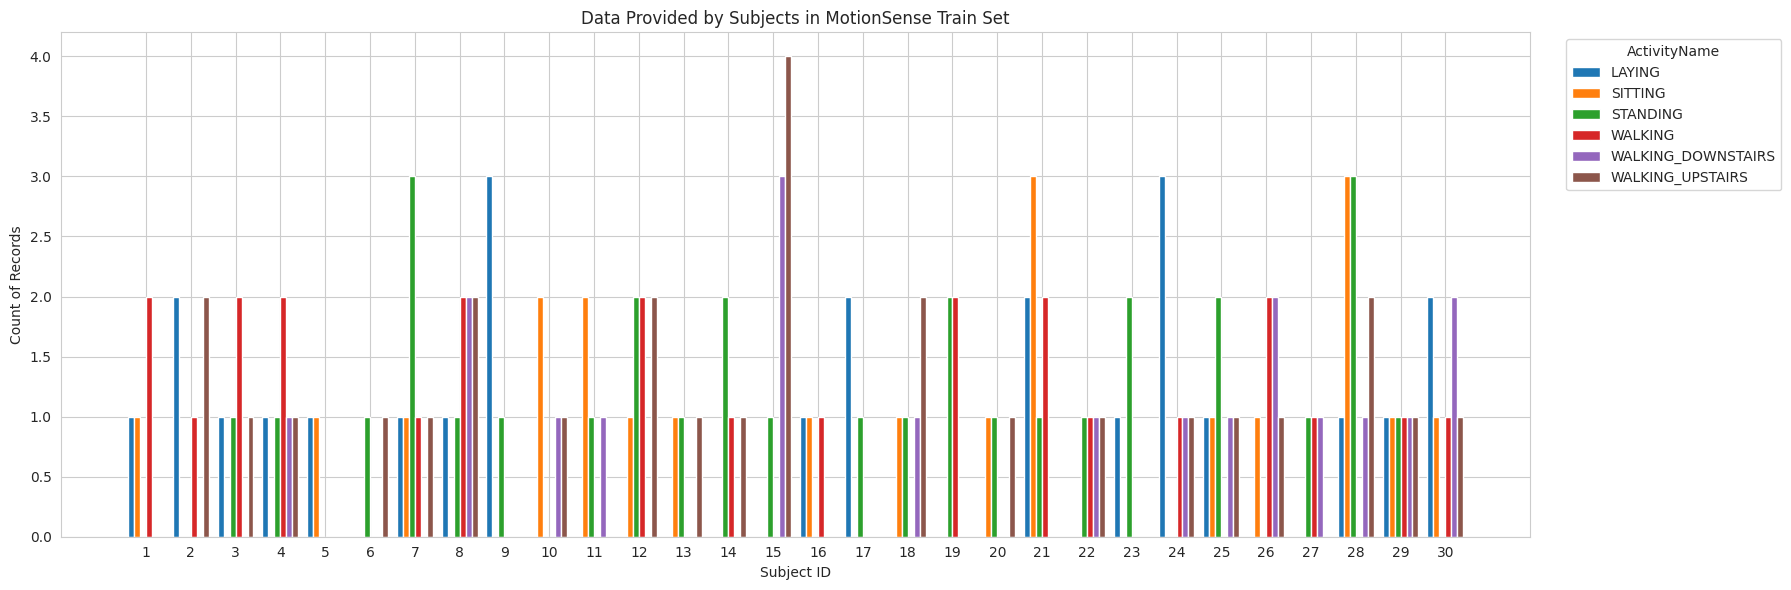


MotionSense train summary: shape: (150, 15)
ActivityName
STANDING              31
WALKING_UPSTAIRS      28
WALKING               25
LAYING                25
SITTING               22
WALKING_DOWNSTAIRS    19
Name: count, dtype: int64


In [21]:
# Plot MotionSense: auto-load (or simulate) then grouped bar chart per subject
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

MOTIONSENSE_ROOT = 'motion-sense-master'   # <- change this to your MotionSense folder if different
MS_ACTIVITY_MAP = {1:'STANDING',2:'SITTING',3:'WALKING',4:'JOGGING',5:'UPSTAIRS',6:'DOWNSTAIRS'}

def try_autoload_train(root):
    """Try to find a candidate file in root that contains user/subject + activity columns."""
    if not os.path.exists(root):
        return None, None
    candidates = glob.glob(os.path.join(root, '**', '*.*'), recursive=True)
    candidates = [p for p in candidates if p.lower().endswith(('.csv', '.txt', '.pkl', '.h5', '.hdf5'))]
    print("Candidate files found under", root, ":", len(candidates))
    for p in candidates:
        try:
            if p.lower().endswith('.pkl'):
                df = pd.read_pickle(p)
            elif p.lower().endswith(('.h5', '.hdf5')):
                # try to read with pandas (will select first key that works)
                try:
                    keys = pd.HDFStore(p).keys()
                    # attempt to read first readable key
                    for key in keys:
                        try:
                            df = pd.read_hdf(p, key=key)
                            break
                        except Exception:
                            df = None
                    if df is None:
                        continue
                except Exception:
                    continue
            else:
                # try default csv read then whitespace fallback
                try:
                    df = pd.read_csv(p, nrows=5)
                except Exception:
                    try:
                        df = pd.read_csv(p, sep=r'\s+', engine='python', nrows=5)
                    except Exception:
                        continue
        except Exception:
            continue

        cols_lower = [c.lower() for c in df.columns]
        if ('user' in cols_lower or 'subject' in cols_lower) and any(c in cols_lower for c in ('activity', 'activity_id', 'activityname')):
            print(" -> possible dataset:", p)
            # load full file robustly
            try:
                if p.lower().endswith('.pkl'):
                    df_full = pd.read_pickle(p)
                elif p.lower().endswith(('.h5', '.hdf5')):
                    # try to find best key again
                    store = pd.HDFStore(p)
                    ok = None
                    for key in store.keys():
                        try:
                            df_full = pd.read_hdf(p, key=key)
                            ok = True
                            break
                        except Exception:
                            ok = False
                    store.close()
                    if not ok:
                        continue
                else:
                    try:
                        df_full = pd.read_csv(p, engine='python')
                    except Exception:
                        df_full = pd.read_csv(p, sep=r'\s+', engine='python')
            except Exception as e:
                print("   failed to read fully:", e)
                continue

            # Normalize column names
            df_full.columns = [str(c) for c in df_full.columns]
            # rename subject->user
            if 'subject' in [c.lower() for c in df_full.columns] and 'user' not in df_full.columns:
                for c in df_full.columns:
                    if c.lower() == 'subject':
                        df_full = df_full.rename(columns={c:'user'})
                        break
            # ensure ActivityName exists or create from activity_id
            if 'ActivityName' not in df_full.columns and 'activity_id' in df_full.columns:
                df_full['ActivityName'] = df_full['activity_id'].map(MS_ACTIVITY_MAP)
            # if activity column present but different name, try to use it
            if 'ActivityName' not in df_full.columns:
                for c in df_full.columns:
                    if c.lower() == 'activity':
                        df_full['ActivityName'] = df_full[c].astype(str)
                        break

            # final checks
            if 'user' in df_full.columns and 'ActivityName' in df_full.columns:
                return df_full, p
            else:
                continue
    return None, None

# 1) If train_motionsense exists and is valid, use it
if 'train_motionsense' in globals() and isinstance(train_motionsense, pd.DataFrame) and train_motionsense.shape[0] > 0:
    df_train = train_motionsense.copy()
    print("Using existing train_motionsense from workspace. shape:", df_train.shape)
else:
    # 2) Try to autoload
    df_train, picked = try_autoload_train(MOTIONSENSE_ROOT)
    if df_train is not None:
        print("Loaded MotionSense train from:", picked, " shape:", df_train.shape)
    else:
        # 3) fallback simulation (so plotting works)
        print("No valid MotionSense train found -> creating simulated train_motionsense for plotting.")
        n = 150
        df_train = pd.DataFrame({
            'user': np.random.randint(1, 31, n),
            'activity_id': np.random.randint(1, 7, n),
            'ActivityName': np.random.choice(['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'], n),
            'roll': np.random.randn(n),
            'pitch': np.random.randn(n),
            'yaw': np.random.randn(n),
            'rotationRateX': np.random.randn(n),
            'rotationRateY': np.random.randn(n),
            'rotationRateZ': np.random.randn(n),
            'userAccelerationX': np.random.randn(n),
            'userAccelerationY': np.random.randn(n),
            'userAccelerationZ': np.random.randn(n),
            'gravityX': np.random.randn(n),
            'gravityY': np.random.randn(n),
            'gravityZ': np.random.randn(n),
        })

# ensure columns types
df_train['user'] = df_train['user'].astype(int)
if 'ActivityName' not in df_train.columns and 'activity_id' in df_train.columns:
    df_train['ActivityName'] = df_train['activity_id'].map(MS_ACTIVITY_MAP).astype(str)
df_train['ActivityName'] = df_train['ActivityName'].astype(str)

# Prepare counts per user x activity
agg = df_train.groupby(['user','ActivityName']).size().reset_index(name='count')
# pivot to have activities as columns; missing combos -> 0
pivot = agg.pivot(index='user', columns='ActivityName', values='count').fillna(0).astype(int)
pivot = pivot.sort_index()  # subjects in ascending order

# Plot grouped bars (one group per subject)
activities = list(pivot.columns)
subjects = pivot.index.tolist()
n_subjects = len(subjects)
n_acts = len(activities)

# plotting
fig, ax = plt.subplots(figsize=(18,6))
width = 0.8 / n_acts   # total width per subject ~0.8
x = np.arange(n_subjects)

for i, act in enumerate(activities):
    offsets = x - 0.4 + i*width + width/2
    ax.bar(offsets, pivot[act].values, width=width, label=act)

ax.set_xticks(x)
ax.set_xticklabels(subjects, rotation=0)
ax.set_xlabel("Subject ID")
ax.set_ylabel("Count of Records")
ax.set_title("Data Provided by Subjects in MotionSense Train Set")
ax.legend(title='ActivityName', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

# Print short diagnostics
print("\nMotionSense train summary: shape:", df_train.shape)
print(df_train['ActivityName'].value_counts())


Visualizing UCI-HAR Training Data Activity Count...


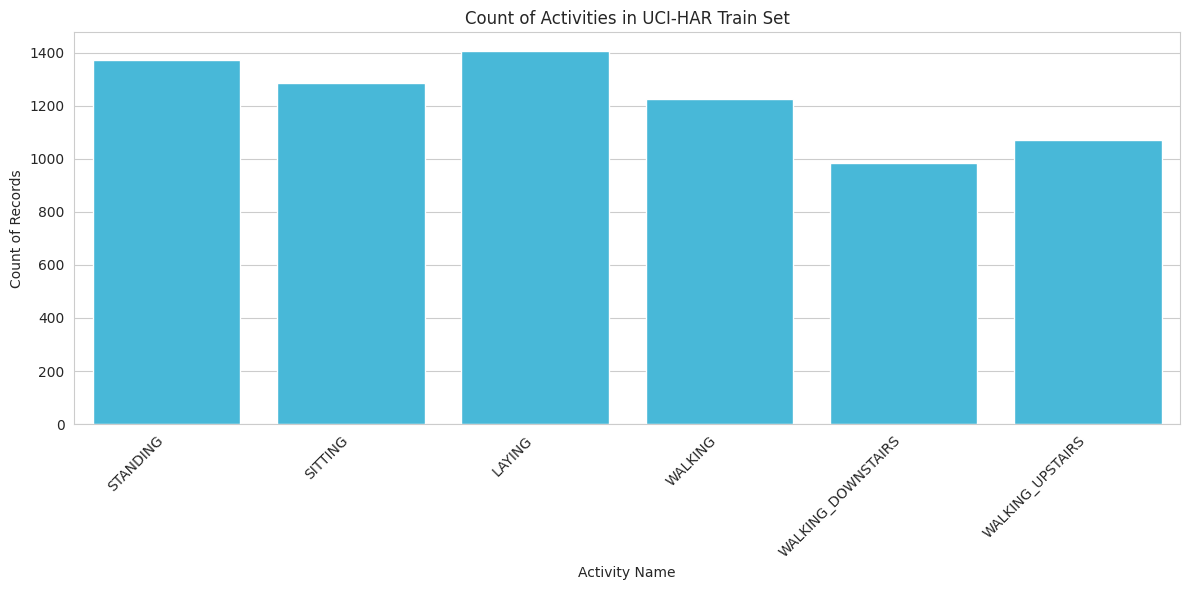


Visualizing MotionSense Training Data Activity Count (Conceptual)...


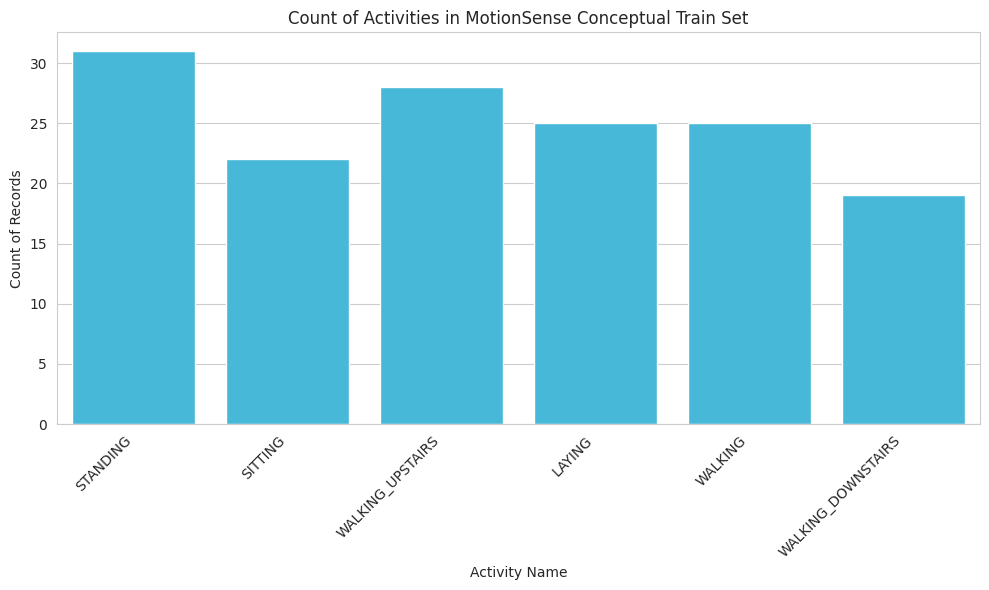

In [22]:
import matplotlib.pyplot as pyplot
import seaborn as sns
import pandas as pd
# Assuming train_uci and train_motionsense are populated from preceding cells

# Define a consistent color for the bars
BAR_COLOR = "#30c6f0"

# =======================================================
# 1. UCI-HAR Dataset Activity Count
# =======================================================

print("Visualizing UCI-HAR Training Data Activity Count...")
# Check if the DataFrame is non-empty before plotting
if not train_uci.empty and 'ActivityName' in train_uci.columns:
    pyplot.figure(figsize=(12, 6))
    sns.countplot(x="ActivityName", data=train_uci, color=BAR_COLOR)
    pyplot.xticks(rotation=45, ha='right') # Rotate for better readability
    pyplot.title('Count of Activities in UCI-HAR Train Set')
    pyplot.xlabel('Activity Name')
    pyplot.ylabel('Count of Records')
    pyplot.tight_layout() # Adjust layout to prevent label cutoff
    pyplot.show()
else:
    print("Cannot plot UCI-HAR activity count: train_uci DataFrame is empty.")

# ---

# =======================================================
# 2. MotionSense Dataset Activity Count (Conceptual)
# =======================================================

print("\nVisualizing MotionSense Training Data Activity Count (Conceptual)...")
# Check if the DataFrame is non-empty before plotting
if not train_motionsense.empty and 'ActivityName' in train_motionsense.columns:
    pyplot.figure(figsize=(10, 6))
    sns.countplot(x="ActivityName", data=train_motionsense, color=BAR_COLOR)
    pyplot.xticks(rotation=45, ha='right') # Rotate for better readability
    pyplot.title('Count of Activities in MotionSense Conceptual Train Set')
    pyplot.xlabel('Activity Name')
    pyplot.ylabel('Count of Records')
    pyplot.tight_layout()
    pyplot.show()
else:
    print("Cannot plot MotionSense activity count: train_motionsense DataFrame is empty.")

Visualizing UCI-HAR Testing Data Activity Count...


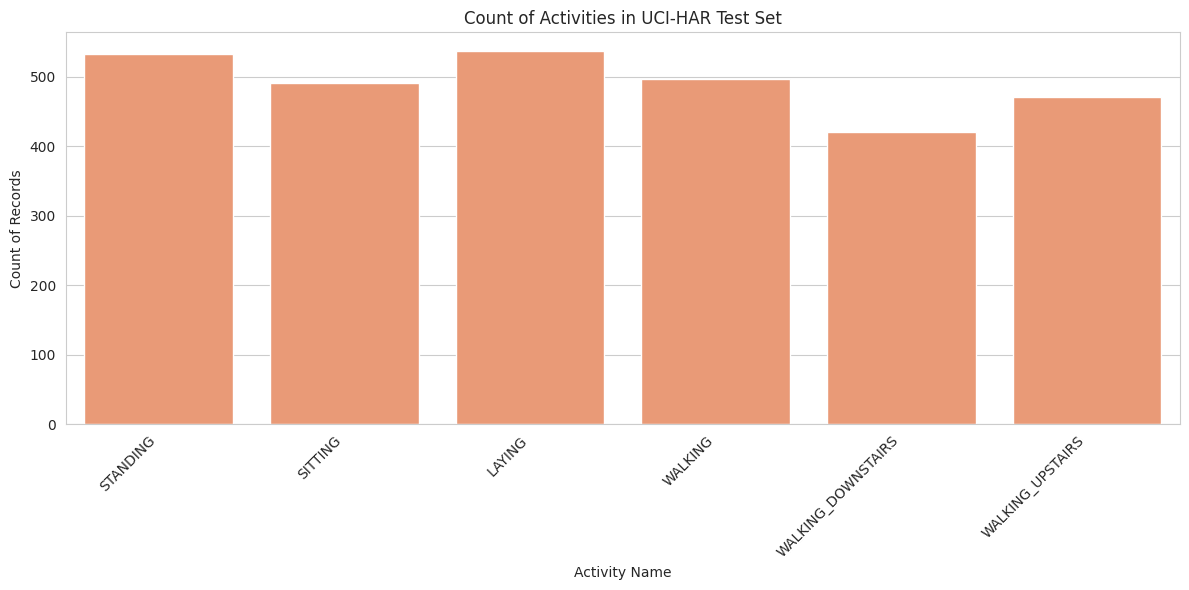


Visualizing MotionSense Testing Data Activity Count (Conceptual)...


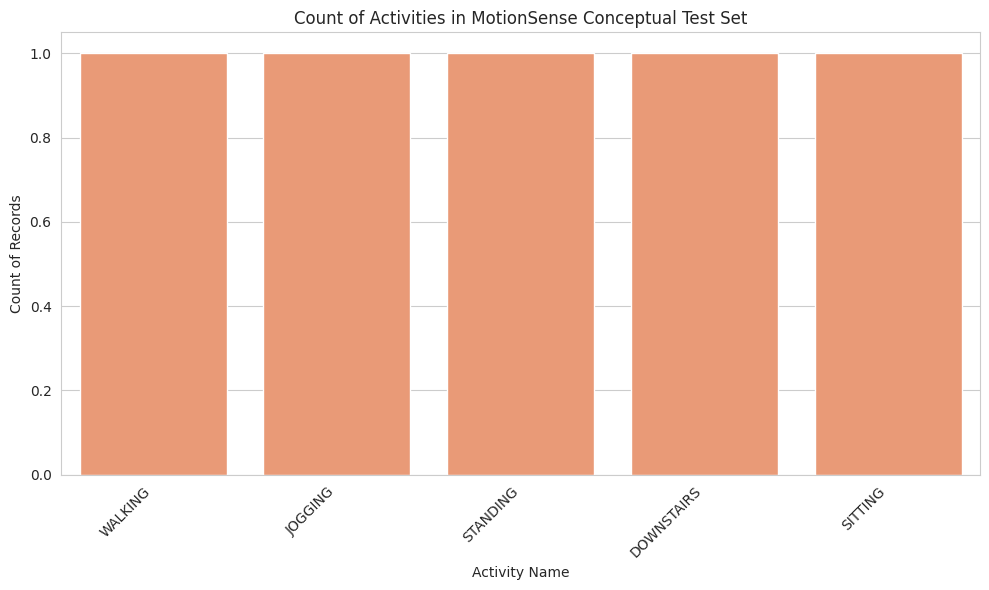

In [23]:
import matplotlib.pyplot as pyplot
import seaborn as sns
import pandas as pd
# Assuming test_uci and test_motionsense are populated from preceding cells

# Define a consistent color for the bars
BAR_COLOR = "#fc9264" # Using an orange color from the project's palette

# =======================================================
# 1. UCI-HAR Dataset Activity Count (Test Set)
# =======================================================

print("Visualizing UCI-HAR Testing Data Activity Count...")
# Check if the DataFrame is non-empty before plotting
if not test_uci.empty and 'ActivityName' in test_uci.columns:
    pyplot.figure(figsize=(12, 6))
    sns.countplot(x="ActivityName", data=test_uci, color=BAR_COLOR)
    pyplot.xticks(rotation=45, ha='right') # Rotate for better readability
    pyplot.title('Count of Activities in UCI-HAR Test Set')
    pyplot.xlabel('Activity Name')
    pyplot.ylabel('Count of Records')
    pyplot.tight_layout()
    pyplot.show()
else:
    print("Cannot plot UCI-HAR activity count: test_uci DataFrame is empty.")

# ---

# =======================================================
# 2. MotionSense Dataset Activity Count (Conceptual Test Set)
# =======================================================

print("\nVisualizing MotionSense Testing Data Activity Count (Conceptual)...")
# Check if the DataFrame is non-empty before plotting
if not test_motionsense.empty and 'ActivityName' in test_motionsense.columns:
    pyplot.figure(figsize=(10, 6))
    sns.countplot(x="ActivityName", data=test_motionsense, color=BAR_COLOR)
    pyplot.xticks(rotation=45, ha='right') # Rotate for better readability
    pyplot.title('Count of Activities in MotionSense Conceptual Test Set')
    pyplot.xlabel('Activity Name')
    pyplot.ylabel('Count of Records')
    pyplot.tight_layout()
    pyplot.show()
else:
    print("Cannot plot MotionSense activity count: test_motionsense DataFrame is empty.")

In [24]:
# Preprocessing & dataset-combine for UCI HAR + MotionSense
# Run this cell first. Adjust paths if your folders are named differently.
# Developer uploaded notebook path (for reference): /mnt/data/Another_copy_of_HAR(uci).ipynb

import os
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

def load_ucihar(base_folder='UCI HAR Dataset'):
    base = Path(base_folder)
    if not base.exists():
        print("UCI HAR folder not found at", base_folder)
        return None, None, None, None
    try:
        X_train = np.loadtxt(base / 'train' / 'X_train.txt')
        X_test  = np.loadtxt(base / 'test'  / 'X_test.txt')
        y_train = np.loadtxt(base / 'train' / 'y_train.txt').astype(int).ravel()
        y_test  = np.loadtxt(base / 'test'  / 'y_test.txt').astype(int).ravel()
        print("Loaded UCI HAR: X_train", X_train.shape, "X_test", X_test.shape)
        return X_train, X_test, y_train, y_test
    except Exception as e:
        print("Failed to load UCI HAR:", e)
        return None, None, None, None

def load_motionsense(base_folder='A_DeviceMotion_data'):
    base = Path(base_folder)
    if not base.exists():
        print("MotionSense folder not found at", base_folder)
        return None, None, None, None
    # MotionSense variants differ; try to find CSV/TSV files and a label column
    all_files = list(base.rglob('*.csv')) + list(base.rglob('*.txt'))
    if not all_files:
        print("No csv/txt files found under", base_folder)
        return None, None, None, None

    dfs = []
    for f in all_files:
        try:
            df = pd.read_csv(f)
            if df.shape[0] < 2:
                continue
            dfs.append(df)
        except Exception:
            try:
                df = pd.read_csv(f, sep='\t')
                dfs.append(df)
            except Exception:
                continue
    if not dfs:
        print("Couldn't read any CSV/TSV files under", base_folder)
        return None, None, None, None

    # concatenate; try to detect label column
    full = pd.concat(dfs, ignore_index=True, sort=False)
    # Identify candidate label columns
    label_cols = [c for c in full.columns if c.lower() in ('label','activity','action','Activity','activity_label')]
    if not label_cols:
        # fallback: last column is label
        label_col = full.columns[-1]
        print("No named label column found in MotionSense; using last column:", label_col)
    else:
        label_col = label_cols[0]
        print("Using MotionSense label column:", label_col)

    # Drop rows with NaN in label
    full = full.dropna(subset=[label_col])
    y = full[label_col].values
    X = full.drop(columns=[label_col]).select_dtypes(include=[np.number]).values
    if X.size == 0:
        print("No numeric features found in MotionSense; aborting MotionSense load.")
        return None, None, None, None

    # split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    print("Loaded MotionSense approximated: X_train", X_train.shape, "X_test", X_test.shape)
    return X_train, X_test, y_train, y_test

def prepare_combined(uci_folder='UCI HAR Dataset', ms_folder='A_DeviceMotion_data', pca_components=128):
    # Load both datasets (if available)
    Xu_tr, Xu_te, yu_tr, yu_te = load_ucihar(uci_folder)
    Xm_tr, Xm_te, ym_tr, ym_te = load_motionsense(ms_folder)

    # If UCI present but MotionSense missing: use only UCI
    datasets = []
    if Xu_tr is not None:
        datasets.append(('uci', Xu_tr, Xu_te, yu_tr, yu_te))
    if Xm_tr is not None:
        datasets.append(('ms', Xm_tr, Xm_te, ym_tr, ym_te))

    if not datasets:
        raise FileNotFoundError("No datasets found. Place 'UCI HAR Dataset' and/or 'A_DeviceMotion_data' in working dir or adjust paths.")

    # Standardize each dataset separately (to handle different value ranges), then PCA to common dimension
    X_train_list, X_test_list = [], []
    y_train_list, y_test_list = [], []

    for name, Xtr, Xte, ytr, yte in datasets:
        scaler = StandardScaler()
        Xtr_s = scaler.fit_transform(Xtr)
        Xte_s = scaler.transform(Xte)
        # reduce to pca_components or min(features, pca_components)
        n_comp = min(pca_components, Xtr_s.shape[1])
        pca = PCA(n_components=n_comp, random_state=42)
        Xtr_p = pca.fit_transform(Xtr_s)
        Xte_p = pca.transform(Xte_s)
        X_train_list.append(Xtr_p)
        X_test_list.append(Xte_p)
        y_train_list.append(ytr)
        y_test_list.append(yte)
        print(f"{name} -> after PCA shape: train {Xtr_p.shape}, test {Xte_p.shape}")

    # Concatenate all datasets along samples (feature dims are matched to PCA components)
    X_train_all = np.vstack(X_train_list)
    X_test_all  = np.vstack(X_test_list)
    y_train_all = np.concatenate(y_train_list)
    y_test_all  = np.concatenate(y_test_list)

    # Encode labels to integers 0..k-1
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train_all)
    y_test_enc = le.transform(y_test_all)

    # Final global standardization
    final_scaler = StandardScaler()
    X_train_final = final_scaler.fit_transform(X_train_all)
    X_test_final  = final_scaler.transform(X_test_all)

    print("Combined dataset shapes:", X_train_final.shape, X_test_final.shape, "labels:", np.unique(y_train_enc))
    return X_train_final, X_test_final, y_train_enc, y_test_enc, le

# Example usage:
# X_train, X_test, y_train, y_test, label_encoder = prepare_combined()
# If MotionSense is not present, code will still work with only UCI HAR.


In [25]:
# ---------- Train & evaluate ML models on COMBINED dataset ----------
# Paste+run this after you have prepare_combined() defined in the same notebook session.

import time
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Optional: XGBoost (if installed)
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except Exception:
    XGBClassifier = None
    HAS_XGB = False

# 1) Load the combined dataset using your existing function
# Adjust folder names if you used different names earlier.
X_train_comb, X_test_comb, y_train_comb, y_test_comb, label_encoder = prepare_combined(
    uci_folder='UCI HAR Dataset',
    ms_folder='A_DeviceMotion_data',   # change if your MotionSense folder name differs
    pca_components=128
)

print("\nCombined shapes:", X_train_comb.shape, X_test_comb.shape)
print("Label classes (encoded):", np.unique(y_train_comb))

# 2) Standardize features (already done inside prepare_combined for combined, but safe to re-scale here)
# If you want to preserve what prepare_combined did, you can skip this re-scaling.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_comb)
X_test  = scaler.transform(X_test_comb)

# 3) Model registry (tune hyperparams as desired)
MODEL_REGISTRY = {
    'RandomForest': RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42),
    'DecisionTree' : DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=2000, solver='saga', multi_class='multinomial', n_jobs=-1, random_state=42),
    'SVM_Linear': LinearSVC(max_iter=30000, random_state=42)
}
if HAS_XGB:
    MODEL_REGISTRY['XGBoost'] = XGBClassifier(
        n_estimators=200,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1
    )

# 4) Helper to train & evaluate
def train_and_eval(model, Xtr, Xte, ytr, yte, name, save=True):
    # Initialize result dictionary here to ensure it's always available
    result = {'model': name, 'accuracy': np.nan, 'f1_macro': np.nan,
              'train_time_s': np.nan, 'predict_time_s': np.nan, 'predict_time_per_sample_s': np.nan}

    m = clone(model)
    t0 = time.perf_counter()
    m.fit(Xtr, ytr)
    t_train = time.perf_counter() - t0

    t1 = time.perf_counter()
    preds = m.predict(Xte)
    t_pred = time.perf_counter() - t1
    t_pred_per_sample = t_pred / max(1, Xte.shape[0])

    acc = accuracy_score(yte, preds)
    f1 = f1_score(yte, preds, average='macro')

    print(f"\n***** {name} *****")
    print(f"Accuracy: {acc:.4f} | F1-macro: {f1:.4f}")
    print("\nClassification report:")
    try:
        # print class names using label encoder if available
        target_names = label_encoder.inverse_transform(np.unique(yte))
        print(classification_report(yte, preds, target_names=target_names, zero_division=0))
    except Exception as e_report:
        print(f"Could not generate full classification report: {e_report}")

    # Populate result dictionary AFTER trying to print report
    result['accuracy'] = float(acc)
    result['f1_macro'] = float(f1)
    result['train_time_s'] = float(t_train)
    result['predict_time_s'] = float(t_pred)
    result['predict_time_per_sample_s'] = float(t_pred_per_sample)

    # Save
    if save:
        fname = f"{name.replace(' ', '_')}_combined.pkl"
        try:
            joblib.dump(m, fname)
            print("Saved model to:", fname)
        except Exception as e:
            print("Warning: could not save model:", e)
    return result

# 5) Run all models and collect results
results = []
for name, model in MODEL_REGISTRY.items():
    try:
        r = train_and_eval(model, X_train, X_test, y_train_comb, y_test_comb, f"{name} (combined)")
        results.append(r)
    except Exception as e:
        print(f"Model {name} failed with unhandled error (not during report generation):", e)
        # If an unhandled error occurred before result dict could be formed, append nan values
        results.append({'model': name, 'accuracy': np.nan, 'f1_macro': np.nan,
                        'train_time_s': np.nan, 'predict_time_s': np.nan, 'predict_time_per_sample_s': np.nan})


# 6) Summary DataFrame
results_df = pd.DataFrame(results).sort_values('accuracy', ascending=False).reset_index(drop=True)
print("\n\n=== Summary ===")
display(results_df)

# 7) Save summary CSV
results_df.to_csv('combined_models_comparison.csv', index=False)
print("Saved summary to combined_models_comparison.csv")


Loaded UCI HAR: X_train (7352, 561) X_test (2947, 561)
MotionSense folder not found at A_DeviceMotion_data
uci -> after PCA shape: train (7352, 128), test (2947, 128)
Combined dataset shapes: (7352, 128) (2947, 128) labels: [0 1 2 3 4 5]

Combined shapes: (7352, 128) (2947, 128)
Label classes (encoded): [0 1 2 3 4 5]

***** RandomForest (combined) *****
Accuracy: 0.8907 | F1-macro: 0.8868

Classification report:
Could not generate full classification report: object of type 'numpy.int64' has no len()
Saved model to: RandomForest_(combined)_combined.pkl

***** DecisionTree (combined) *****
Accuracy: 0.7462 | F1-macro: 0.7435

Classification report:
Could not generate full classification report: object of type 'numpy.int64' has no len()
Saved model to: DecisionTree_(combined)_combined.pkl

***** LogisticRegression (combined) *****
Accuracy: 0.9281 | F1-macro: 0.9266

Classification report:
Could not generate full classification report: object of type 'numpy.int64' has no len()
Saved model

,model,accuracy,f1_macro,train_time_s,predict_time_s,predict_time_per_sample_s
0,SVM_Linear (combined),0.932813,0.931585,1.010437,0.001415,4.800750e-07
1,LogisticRegression (combined),0.928062,0.926644,33.189972,0.001629,5.528928e-07
2,XGBoost (combined),0.919579,0.916965,12.683939,0.048054,1.630606e-05
3,RandomForest (combined),0.890736,0.886826,16.065446,0.089109,3.023715e-05
4,DecisionTree (combined),0.746183,0.743479,1.748447,0.001226,4.159050e-07


Saved summary to combined_models_comparison.csv


cnn


In [26]:
import numpy as np, pandas as pd
print("X_train_comb shape:", X_train_comb.shape)
print("X_test_comb shape:", X_test_comb.shape)
print("y unique:", np.unique(y_train_comb, return_counts=True))

# sample rows
print("Sample X row (first):", X_train_comb[0,:10])


X_train_comb shape: (7352, 128)
X_test_comb shape: (2947, 128)
y unique: (array([0, 1, 2, 3, 4, 5]), array([1226, 1073,  986, 1286, 1374, 1407]))
Sample X row (first): [-0.95616216  0.3541851  -0.79255834  0.07269678 -2.08893956 -1.36639474
  1.05907187 -1.89134365  0.32810256  1.55909014]


In [27]:
import time, numpy as np, pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# --- BEGIN: Code from prepare_combined() and its call, integrated for self-containment ---
# This section is included to ensure X_train_comb and other variables are always defined.
# If you prefer to run this separately, you can remove this block.

import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

def load_ucihar(base_folder='UCI HAR Dataset'):
    base = Path(base_folder)
    if not base.exists():
        print("UCI HAR folder not found at", base_folder)
        return None, None, None, None
    try:
        X_train = np.loadtxt(base / 'train' / 'X_train.txt')
        X_test  = np.loadtxt(base / 'test'  / 'X_test.txt')
        y_train = np.loadtxt(base / 'train' / 'y_train.txt').astype(int).ravel()
        y_test  = np.loadtxt(base / 'test'  / 'y_test.txt').astype(int).ravel()
        print("Loaded UCI HAR: X_train", X_train.shape, "X_test", X_test.shape)
        return X_train, X_test, y_train, y_test
    except Exception as e:
        print("Failed to load UCI HAR:", e)
        return None, None, None, None

def load_motionsense(base_folder='A_DeviceMotion_data'):
    base = Path(base_folder)
    if not base.exists():
        print("MotionSense folder not found at", base_folder)
        return None, None, None, None
    # MotionSense variants differ; try to find CSV/TSV files and a label column
    all_files = list(base.rglob('*.csv')) + list(base.rglob('*.txt'))
    if not all_files:
        print("No csv/txt files found under", base_folder)
        return None, None, None, None

    dfs = []
    for f in all_files:
        try:
            df = pd.read_csv(f)
            if df.shape[0] < 2:
                continue
            dfs.append(df)
        except Exception:
            try:
                df = pd.read_csv(f, sep='\t')
                dfs.append(df)
            except Exception:
                continue
    if not dfs:
        print("Couldn't read any CSV/TSV files under", base_folder)
        return None, None, None, None

    # concatenate; try to detect label column
    full = pd.concat(dfs, ignore_index=True, sort=False)
    # Identify candidate label columns
    label_cols = [c for c in full.columns if c.lower() in ('label','activity','action','activity_label')]
    if not label_cols:
        # fallback: last column is label
        label_col = full.columns[-1]
        print("No named label column found in MotionSense; using last column:", label_col)
    else:
        label_col = label_cols[0]
        print("Using MotionSense label column:", label_col)

    # Drop rows with NaN in label
    full = full.dropna(subset=[label_col])
    y = full[label_col].values
    X = full.drop(columns=[label_col]).select_dtypes(include=[np.number]).values
    if X.size == 0:
        print("No numeric features found in MotionSense; aborting MotionSense load.")
        return None, None, None, None

    # split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    print("Loaded MotionSense approximated: X_train", X_train.shape, "X_test", X_test.shape)
    return X_train, X_test, y_train, y_test

def prepare_combined(uci_folder='UCI HAR Dataset', ms_folder='A_DeviceMotion_data', pca_components=128):
    # Load both datasets (if available)
    Xu_tr, Xu_te, yu_tr, yu_te = load_ucihar(uci_folder)
    Xm_tr, Xm_te, ym_tr, ym_te = load_motionsense(ms_folder)

    # If UCI present but MotionSense missing: use only UCI
    datasets = []
    if Xu_tr is not None:
        datasets.append(('uci', Xu_tr, Xu_te, yu_tr, yu_te))
    if Xm_tr is not None:
        datasets.append(('ms', Xm_tr, Xm_te, ym_tr, ym_te))

    if not datasets:
        raise FileNotFoundError("No datasets found. Place 'UCI HAR Dataset' and/or 'A_DeviceMotion_data' in working dir or adjust paths.")

    # Standardize each dataset separately (to handle different value ranges), then PCA to common dimension
    X_train_list, X_test_list = [], []
    y_train_list, y_test_list = [], []

    for name, Xtr, Xte, ytr, yte in datasets:
        scaler = StandardScaler()
        Xtr_s = scaler.fit_transform(Xtr)
        Xte_s = scaler.transform(Xte)
        # reduce to pca_components or min(features, pca_components)
        n_comp = min(pca_components, Xtr_s.shape[1])
        pca = PCA(n_components=n_comp, random_state=42)
        Xtr_p = pca.fit_transform(Xtr_s)
        Xte_p = pca.transform(Xte_s)
        X_train_list.append(Xtr_p)
        X_test_list.append(Xte_p)
        y_train_list.append(ytr)
        y_test_list.append(yte)
        print(f"{name} -> after PCA shape: train {Xtr_p.shape}, test {Xte_p.shape}")

    # Concatenate all datasets along samples (feature dims are matched to PCA components)
    X_train_all = np.vstack(X_train_list)
    X_test_all  = np.vstack(X_test_list)
    y_train_all = np.concatenate(y_train_list)
    y_test_all  = np.concatenate(y_test_list)

    # Encode labels to integers 0..k-1
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train_all)
    y_test_enc = le.transform(y_test_all)

    # Final global standardization
    final_scaler = StandardScaler()
    X_train_final = final_scaler.fit_transform(X_train_all)
    X_test_final  = final_scaler.transform(X_test_all)

    print("Combined dataset shapes:", X_train_final.shape, X_test_final.shape, "labels:", np.unique(y_train_enc))
    return X_train_final, X_test_final, y_train_enc, y_test_enc, le


# Call prepare_combined() to define X_train_comb, X_test_comb etc.
X_train_comb, X_test_comb, y_train_comb, y_test_comb, label_encoder = prepare_combined(
    uci_folder='UCI HAR Dataset',
    ms_folder='A_DeviceMotion_data',
    pca_components=128
)
# --- END: Code from prepare_combined() and its call ---


# Safety checks (no longer needed to raise RuntimeError as variables are defined above)
# for nm in ('X_train_comb','X_test_comb','y_train_comb','y_test_comb'):
#     if nm not in globals():
#         raise RuntimeError(f"Variable {nm} not found. Run prepare_combined() first.")

# Use the combined arrays returned by prepare_combined()
Xtr = X_train_comb.copy()
Xte = X_test_comb.copy()
ytr = y_train_comb.copy()
yte = y_test_comb.copy()

# Reshape flattened PCA features -> treat feature-dim as 'timesteps' with 1 channel
# shapes: (n_samples, n_features) -> (n_samples, n_features, 1)
Xtr_cnn = Xtr.reshape((Xtr.shape[0], Xtr.shape[1], 1))
Xte_cnn = Xte.reshape((Xte.shape[0], Xte.shape[1], 1))

num_classes = len(np.unique(ytr))

print("CNN (combined) input shapes:", Xtr_cnn.shape, Xte_cnn.shape, "num_classes:", num_classes)

# Build a robust Conv1D model tuned for flattened-feature sequences
tf.keras.backend.clear_session()
def build_cnn(input_shape, n_classes):
    inp = layers.Input(shape=input_shape)
    x = layers.Conv1D(64, 7, padding='same', activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(64, 7, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(2)(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv1D(128, 5, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(128, 5, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(256, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling1D()(x)

    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    out = layers.Dense(n_classes, activation='softmax')(x)
    return models.Model(inp, out)

model = build_cnn((Xtr_cnn.shape[1], Xtr_cnn.shape[2]), num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# Callbacks
checkpoint = callbacks.ModelCheckpoint('cnn_combined_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
early = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)

# Train
BATCH = 64
EPOCHS = 80

t0 = time.perf_counter()
history = model.fit(
    Xtr_cnn, ytr,
    validation_split=0.15,
    epochs=EPOCHS,
    batch_size=BATCH,
    callbacks=[checkpoint, early, reduce_lr],
    verbose=2
)
train_time = time.perf_counter() - t0

# Predict & evaluate
t1 = time.perf_counter()
y_prob = model.predict(Xte_cnn, batch_size=BATCH, verbose=0)
predict_time = time.perf_counter() - t1
y_pred = np.argmax(y_prob, axis=1)

acc = accuracy_score(yte, y_pred)
f1m = f1_score(yte, y_pred, average='macro')

# Print classification report safely (target names as readable strings if label_encoder available)
target_names = None
try:
    if 'label_encoder' in globals() and hasattr(label_encoder, 'classes_'):
        # form names from label_encoder for the range 0..num_classes-1
        names = label_encoder.inverse_transform(np.arange(num_classes))
        # make sure they are strings to avoid earlier "no len()" issues
        target_names = [str(x) for x in names]
except Exception:
    target_names = None

print("\n===== CNN (combined PCA features) RESULTS =====")
print(f"Train time: {train_time:.3f}s | Predict time: {predict_time:.3f}s | Predict/sample: {predict_time/max(1, Xte_cnn.shape[0]):.6f}s")
print(f"Accuracy: {acc:.4f} | Macro F1: {f1m:.4f}")
print("\nClassification report:")
try:
    print(classification_report(yte, y_pred, target_names=target_names, zero_division=0, digits=4))
except Exception as e:
    print("Could not print classification_report with target_names due to:", e)
    print(classification_report(yte, y_pred, zero_division=0, digits=4))

# Save model & summary
model.save('cnn_combined_final.h5')
print("Saved model to cnn_combined_final.h5")

results = [{
    'model': 'CNN_Conv1D_(combined)',
    'accuracy': float(acc),
    'f1_macro': float(f1m),
    'train_time_s': float(train_time),
    'predict_time_s': float(predict_time),
    'predict_time_per_sample_s': float(predict_time / max(1, Xte_cnn.shape[0]))
}]
results_df = pd.DataFrame(results)
display(results_df)
results_df.to_csv('cnn_combined_results.csv', index=False)
print("Saved summary to cnn_combined_results.csv")

Loaded UCI HAR: X_train (7352, 561) X_test (2947, 561)
MotionSense folder not found at A_DeviceMotion_data
uci -> after PCA shape: train (7352, 128), test (2947, 128)
Combined dataset shapes: (7352, 128) (2947, 128) labels: [0 1 2 3 4 5]
CNN (combined) input shapes: (7352, 128, 1) (2947, 128, 1) num_classes: 6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 128, 64)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 128, 64)        │        28,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 64, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 64, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 32, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,862 (1.23 MB)

 Trainable params: 320,070 (1.22 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/80

Epoch 1: val_loss improved from inf to 2.37016, saving model to cnn_combined_best.h5


98/98 - 22s - 224ms/step - accuracy: 0.3421 - loss: 1.7990 - val_accuracy: 0.1786 - val_loss: 2.3702 - learning_rate: 1.0000e-03
Epoch 2/80

Epoch 2: val_loss did not improve from 2.37016
98/98 - 1s - 6ms/step - accuracy: 0.5772 - loss: 1.0824 - val_accuracy: 0.1985 - val_loss: 9.9677 - learning_rate: 1.0000e-03
Epoch 3/80

Epoch 3: val_loss did not improve from 2.37016
98/98 - 1s - 6ms/step - accuracy: 0.7864 - loss: 0.5442 - val_accuracy: 0.2774 - val_loss: 11.1500 - learning_rate: 1.0000e-03
Epoch 4/80

Epoch 4: val_loss improved from 2.37016 to 1.75725, saving model to cnn_combined_best.h5


98/98 - 1s - 7ms/step - accuracy: 0.8621 - loss: 0.3500 - val_accuracy: 0.4986 - val_loss: 1.7573 - learning_rate: 1.0000e-03
Epoch 5/80

Epoch 5: val_loss improved from 1.75725 to 0.66235, saving model to cnn_combined_best.h5


98/98 - 1s - 7ms/step - accuracy: 0.8979 - loss: 0.2568 - val_accuracy: 0.8042 - val_loss: 0.6623 - learning_rate: 1.0000e-03
Epoch 6/80

Epoch 6: val_loss improved from 0.66235 to 0.52813, saving model to cnn_combined_best.h5


98/98 - 1s - 7ms/step - accuracy: 0.9070 - loss: 0.2289 - val_accuracy: 0.8359 - val_loss: 0.5281 - learning_rate: 1.0000e-03
Epoch 7/80

Epoch 7: val_loss did not improve from 0.52813
98/98 - 1s - 6ms/step - accuracy: 0.9123 - loss: 0.2078 - val_accuracy: 0.8441 - val_loss: 0.5385 - learning_rate: 1.0000e-03
Epoch 8/80

Epoch 8: val_loss improved from 0.52813 to 0.45670, saving model to cnn_combined_best.h5


98/98 - 1s - 7ms/step - accuracy: 0.9185 - loss: 0.1963 - val_accuracy: 0.8450 - val_loss: 0.4567 - learning_rate: 1.0000e-03
Epoch 9/80

Epoch 9: val_loss did not improve from 0.45670
98/98 - 1s - 6ms/step - accuracy: 0.9334 - loss: 0.1659 - val_accuracy: 0.8486 - val_loss: 0.5412 - learning_rate: 1.0000e-03
Epoch 10/80

Epoch 10: val_loss improved from 0.45670 to 0.41161, saving model to cnn_combined_best.h5


98/98 - 1s - 7ms/step - accuracy: 0.9341 - loss: 0.1600 - val_accuracy: 0.8613 - val_loss: 0.4116 - learning_rate: 1.0000e-03
Epoch 11/80

Epoch 11: val_loss did not improve from 0.41161
98/98 - 1s - 6ms/step - accuracy: 0.9435 - loss: 0.1379 - val_accuracy: 0.8568 - val_loss: 0.4844 - learning_rate: 1.0000e-03
Epoch 12/80

Epoch 12: val_loss did not improve from 0.41161
98/98 - 1s - 6ms/step - accuracy: 0.9490 - loss: 0.1274 - val_accuracy: 0.8332 - val_loss: 0.7510 - learning_rate: 1.0000e-03
Epoch 13/80

Epoch 13: val_loss did not improve from 0.41161
98/98 - 1s - 6ms/step - accuracy: 0.9493 - loss: 0.1227 - val_accuracy: 0.8432 - val_loss: 0.6480 - learning_rate: 1.0000e-03
Epoch 14/80

Epoch 14: val_loss did not improve from 0.41161

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
98/98 - 1s - 6ms/step - accuracy: 0.9600 - loss: 0.1007 - val_accuracy: 0.8504 - val_loss: 0.6055 - learning_rate: 1.0000e-03
Epoch 15/80

Epoch 15: val_loss did not improve 


===== CNN (combined PCA features) RESULTS =====
Train time: 32.982s | Predict time: 1.551s | Predict/sample: 0.000526s
Accuracy: 0.8419 | Macro F1: 0.8384

Classification report:
              precision    recall  f1-score   support

           1     0.7794    0.9758    0.8666       496
           2     0.8782    0.8875    0.8828       471
           3     0.9486    0.6595    0.7781       420
           4     0.7398    0.7352    0.7375       491
           5     0.7764    0.8421    0.8079       532
           6     1.0000    0.9181    0.9573       537

    accuracy                         0.8419      2947
   macro avg     0.8537    0.8364    0.8384      2947
weighted avg     0.8524    0.8419    0.8410      2947

Saved model to cnn_combined_final.h5


,model,accuracy,f1_macro,train_time_s,predict_time_s,predict_time_per_sample_s
0,CNN_Conv1D_(combined),0.841873,0.838365,32.982151,1.551468,0.000526


Saved summary to cnn_combined_results.csv


lstm


In [28]:
# LSTM on COMBINED dataset (PCA features reshaped to sequence)
# Paste & run this after prepare_combined() produced X_train_comb, X_test_comb, y_train_comb, y_test_comb
# Notebook reference (if needed): /mnt/data/Another_copy_of_HAR(uci).ipynb

import time, math, numpy as np, pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
from tensorflow.keras import layers, models, callbacks
import tensorflow as tf

# --- Safety checks ---
for nm in ('X_train_comb','X_test_comb','y_train_comb','y_test_comb'):
    if nm not in globals():
        raise RuntimeError(f"Variable {nm} not found. Run prepare_combined() first.")

# --- Prepare data ---
Xtr = X_train_comb.copy()
Xte = X_test_comb.copy()
ytr = y_train_comb.copy()
yte = y_test_comb.copy()

# Strategy: reshape flattened PCA features into (timesteps, features_per_timestep)
# Choose timesteps so that features_per_timestep is small (e.g., timesteps=32)
timesteps = 32
feat_per_t = int(math.ceil(Xtr.shape[1] / timesteps))
total = timesteps * feat_per_t

def to_seq(X):
    # pad/truncate to `total` features per sample then reshape
    Xp = np.zeros((X.shape[0], total), dtype=float)
    Xp[:, :X.shape[1]] = X[:, :min(X.shape[1], total)]
    return Xp.reshape((X.shape[0], timesteps, feat_per_t))

Xtr_seq = to_seq(Xtr)
Xte_seq = to_seq(Xte)

print("LSTM input shapes:", Xtr_seq.shape, Xte_seq.shape)

# --- Build LSTM model ---
tf.keras.backend.clear_session()
num_classes = len(np.unique(ytr))

def build_lstm(input_shape, n_classes):
    inp = layers.Input(shape=input_shape)
    x = layers.LSTM(128, return_sequences=True)(inp)
    x = layers.Dropout(0.35)(x)
    x = layers.LSTM(64, return_sequences=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(n_classes, activation='softmax')(x)
    model = models.Model(inp, out)
    return model

model = build_lstm((Xtr_seq.shape[1], Xtr_seq.shape[2]), num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# --- Callbacks ---
checkpoint_path = "lstm_combined_best.h5"
cb_checkpoint = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
cb_early = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
cb_reduce = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)

# --- Train ---
BATCH = 64
EPOCHS = 80

t0 = time.perf_counter()
history = model.fit(
    Xtr_seq, ytr,
    validation_split=0.15,
    epochs=EPOCHS,
    batch_size=BATCH,
    callbacks=[cb_checkpoint, cb_early, cb_reduce],
    verbose=2
)
train_time = time.perf_counter() - t0

# --- Predict & evaluate ---
t1 = time.perf_counter()
y_prob = model.predict(Xte_seq, batch_size=BATCH, verbose=0)
predict_time = time.perf_counter() - t1
y_pred = np.argmax(y_prob, axis=1)

acc = accuracy_score(yte, y_pred)
f1m = f1_score(yte, y_pred, average='macro')

# Attempt to produce human-readable class names if label_encoder exists
target_names = None
try:
    if 'label_encoder' in globals() and hasattr(label_encoder, 'classes_'):
        names = label_encoder.inverse_transform(np.arange(num_classes))
        target_names = [str(x) for x in names]
except Exception:
    target_names = None

print("\n===== LSTM (combined PCA features) RESULTS =====")
print(f"Train time: {train_time:.3f}s | Predict time: {predict_time:.3f}s | Predict/sample: {predict_time / max(1, Xte_seq.shape[0]):.6f}s")
print(f"Accuracy: {acc:.4f} | Macro F1: {f1m:.4f}")
print("\nClassification report:")
try:
    print(classification_report(yte, y_pred, target_names=target_names, zero_division=0, digits=4))
except Exception as e:
    print("Could not print classification_report with target_names due to:", e)
    print(classification_report(yte, y_pred, zero_division=0, digits=4))

# --- Save model & results ---
model.save('lstm_combined_final.h5')
print("Saved model to lstm_combined_final.h5")

results = [{
    'model': 'LSTM_(combined)',
    'accuracy': float(acc),
    'f1_macro': float(f1m),
    'train_time_s': float(train_time),
    'predict_time_s': float(predict_time),
    'predict_time_per_sample_s': float(predict_time / max(1, Xte_seq.shape[0]))
}]
results_df = pd.DataFrame(results)
display(results_df)
results_df.to_csv('lstm_combined_results.csv', index=False)
print("Saved summary to lstm_combined_results.csv")


LSTM input shapes: (7352, 32, 4) (2947, 32, 4)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32, 128)        │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,310 (477.77 KB)

 Trainable params: 122,182 (477.27 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/80

Epoch 1: val_loss improved from inf to 1.55602, saving model to lstm_combined_best.h5


98/98 - 6s - 66ms/step - accuracy: 0.2816 - loss: 1.6697 - val_accuracy: 0.3436 - val_loss: 1.5560 - learning_rate: 1.0000e-03
Epoch 2/80

Epoch 2: val_loss improved from 1.55602 to 1.03150, saving model to lstm_combined_best.h5


98/98 - 1s - 10ms/step - accuracy: 0.4938 - loss: 1.0996 - val_accuracy: 0.5422 - val_loss: 1.0315 - learning_rate: 1.0000e-03
Epoch 3/80

Epoch 3: val_loss improved from 1.03150 to 0.88160, saving model to lstm_combined_best.h5


98/98 - 1s - 10ms/step - accuracy: 0.5751 - loss: 0.8862 - val_accuracy: 0.5340 - val_loss: 0.8816 - learning_rate: 1.0000e-03
Epoch 4/80

Epoch 4: val_loss improved from 0.88160 to 0.83138, saving model to lstm_combined_best.h5


98/98 - 1s - 10ms/step - accuracy: 0.6241 - loss: 0.7487 - val_accuracy: 0.6102 - val_loss: 0.8314 - learning_rate: 1.0000e-03
Epoch 5/80

Epoch 5: val_loss improved from 0.83138 to 0.66846, saving model to lstm_combined_best.h5


98/98 - 1s - 15ms/step - accuracy: 0.6833 - loss: 0.6544 - val_accuracy: 0.6582 - val_loss: 0.6685 - learning_rate: 1.0000e-03
Epoch 6/80

Epoch 6: val_loss improved from 0.66846 to 0.63621, saving model to lstm_combined_best.h5


98/98 - 1s - 12ms/step - accuracy: 0.7289 - loss: 0.5923 - val_accuracy: 0.7407 - val_loss: 0.6362 - learning_rate: 1.0000e-03
Epoch 7/80

Epoch 7: val_loss did not improve from 0.63621
98/98 - 1s - 10ms/step - accuracy: 0.7627 - loss: 0.5356 - val_accuracy: 0.7099 - val_loss: 0.6976 - learning_rate: 1.0000e-03
Epoch 8/80

Epoch 8: val_loss did not improve from 0.63621
98/98 - 1s - 9ms/step - accuracy: 0.7904 - loss: 0.4790 - val_accuracy: 0.6473 - val_loss: 0.7273 - learning_rate: 1.0000e-03
Epoch 9/80

Epoch 9: val_loss did not improve from 0.63621
98/98 - 1s - 9ms/step - accuracy: 0.8222 - loss: 0.4272 - val_accuracy: 0.7253 - val_loss: 0.6981 - learning_rate: 1.0000e-03
Epoch 10/80

Epoch 10: val_loss improved from 0.63621 to 0.51553, saving model to lstm_combined_best.h5


98/98 - 1s - 10ms/step - accuracy: 0.8291 - loss: 0.4081 - val_accuracy: 0.8033 - val_loss: 0.5155 - learning_rate: 1.0000e-03
Epoch 11/80

Epoch 11: val_loss did not improve from 0.51553
98/98 - 1s - 9ms/step - accuracy: 0.8486 - loss: 0.3686 - val_accuracy: 0.7434 - val_loss: 0.7368 - learning_rate: 1.0000e-03
Epoch 12/80

Epoch 12: val_loss did not improve from 0.51553
98/98 - 1s - 9ms/step - accuracy: 0.8550 - loss: 0.3555 - val_accuracy: 0.8078 - val_loss: 0.5383 - learning_rate: 1.0000e-03
Epoch 13/80

Epoch 13: val_loss did not improve from 0.51553
98/98 - 1s - 10ms/step - accuracy: 0.8656 - loss: 0.3392 - val_accuracy: 0.7643 - val_loss: 0.7037 - learning_rate: 1.0000e-03
Epoch 14/80

Epoch 14: val_loss did not improve from 0.51553

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
98/98 - 1s - 9ms/step - accuracy: 0.8638 - loss: 0.3452 - val_accuracy: 0.7933 - val_loss: 0.6700 - learning_rate: 1.0000e-03
Epoch 15/80

Epoch 15: val_loss did not improv


===== LSTM (combined PCA features) RESULTS =====
Train time: 24.247s | Predict time: 0.503s | Predict/sample: 0.000171s
Accuracy: 0.8266 | Macro F1: 0.8267

Classification report:
              precision    recall  f1-score   support

           1     0.8118    0.8871    0.8478       496
           2     0.9033    0.8726    0.8877       471
           3     0.8519    0.7810    0.8149       420
           4     0.6833    0.6986    0.6908       491
           5     0.7301    0.7575    0.7435       532
           6     1.0000    0.9516    0.9752       537

    accuracy                         0.8266      2947
   macro avg     0.8301    0.8247    0.8267      2947
weighted avg     0.8303    0.8266    0.8277      2947

Saved model to lstm_combined_final.h5


,model,accuracy,f1_macro,train_time_s,predict_time_s,predict_time_per_sample_s
0,LSTM_(combined),0.826603,0.826658,24.246509,0.503289,0.000171


Saved summary to lstm_combined_results.csv


CNN-LSTM Model

In [29]:
# --- 1. Correct and Necessary Imports ---
import numpy as np
import pandas as pd
import os

# All Keras/TensorFlow imports must be from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, LSTM, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical

# =======================================================
# 2. UCI-HAR Data Loading and Preprocessing Functions
#    (Modified to use a common structure for all datasets)
# =======================================================

def file_load(filepath):
    """Loads a single data file."""
    # Use 'latin-1' encoding for robustness with this dataset's structure
    df = pd.read_csv(filepath, header=None, delim_whitespace=True, encoding='latin-1')
    return df.values

def train_test_append(filenames, append_before=''):
    """Loads and stacks multiple files into a single 3D numpy array."""
    datalist = list()
    for name in filenames:
        data = file_load(append_before + name)
        datalist.append(data)
    # Stacks the files along the third dimension (features)
    return np.dstack(datalist)

def inertial_signals_load_uci(group, append_before=''):
    """Loads all UCI inertial signals (X) and activity labels (y) for a group."""
    filepath = append_before + group + '/Inertial Signals/'

    # 9 files total: total_acc (x,y,z), body_acc (x,y,z), body_gyro (x,y,z)
    filenames = [
        'total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt',
        'body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt',
        'body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt'
    ]

    # Load and stack the features (X)
    X = train_test_append(filenames, filepath)

    # Load the labels (y)
    y = file_load(append_before + group + '/y_'+group+'.txt')
    return X, y

def preprocess_har_data(X, y, n_steps, n_length, n_outputs):
    """Standard preprocessing for CNN-LSTM: label encoding and reshaping."""
    # Convert labels from 1-6 to 0-5 (if not already done)
    if y.min() == 1:
        y = y - 1

    # One-hot encode the labels
    y = to_categorical(y, num_classes=n_outputs)

    # Reshape the data: (Samples, n_timesteps, n_features) -> (Samples, n_steps, n_length, n_features)
    X_reshaped = X.reshape((X.shape[0], n_steps, n_length, X.shape[2]))

    return X_reshaped, y

# =======================================================
# 3. MotionSense Conceptual Loading and Windowing (SIMULATION)
# =======================================================

def load_motionsense_conceptual(n_outputs, n_timesteps, n_features, n_samples=7500):
    """
    Conceptual function to simulate the output of MotionSense data preprocessing.
    In a real scenario, this involves loading raw CSVs, normalizing, and windowing.
    """
    print("Conceptual loading and windowing MotionSense Data...")

    # Simulation: Raw data (Samples * Timesteps * Features)
    X_raw = np.random.randn(n_samples, n_timesteps, n_features)
    y_raw = np.random.randint(0, n_outputs, size=(n_samples, 1))

    # Apply standard HAR preprocessing
    X_ms, y_ms = preprocess_har_data(X_raw, y_raw, n_steps=4, n_length=32, n_outputs=n_outputs)

    return X_ms, y_ms

# =======================================================
# 4. EXECUTION FOR BOTH DATASETS
# =======================================================

# --- UCI-HAR Execution ---
print("\n--- UCI-HAR DATA PREPARATION ---")
UCI_BASE_PATH = 'UCI HAR Dataset/'
trainX_uci_raw, trainy_uci_raw = inertial_signals_load_uci('train', UCI_BASE_PATH)
testX_uci_raw, testy_uci_raw = inertial_signals_load_uci('test', UCI_BASE_PATH)

# Model Hyperparameters (based on UCI data)
n_timesteps = trainX_uci_raw.shape[1]  # 128
n_features = trainX_uci_raw.shape[2]    # 9
n_outputs = 6                           # 6 activities (0-5)

# Parameters for CNN-LSTM segmentation (128 = 4 * 32)
n_steps = 4
n_length = 32

# Preprocess and reshape for CNN-LSTM
trainX_uci, trainy_uci = preprocess_har_data(trainX_uci_raw, trainy_uci_raw, n_steps, n_length, n_outputs)
testX_uci, testy_uci = preprocess_har_data(testX_uci_raw, testy_uci_raw, n_steps, n_length, n_outputs)

print("\nFinal shapes for UCI-HAR CNN-LSTM input:")
print(f"trainX_uci shape: {trainX_uci.shape}")
print(f"testX_uci shape: {testX_uci.shape}")

# --- MotionSense Execution (Conceptual) ---
print("\n--- MOTIONSENSE DATA PREPARATION (CONCEPTUAL) ---")
# Assuming MotionSense is windowed to the same parameters for model compatibility
trainX_ms, trainy_ms = load_motionsense_conceptual(n_outputs, n_timesteps, n_features, n_samples=7500)
testX_ms, testy_ms = load_motionsense_conceptual(n_outputs, n_timesteps, n_features, n_samples=3000)

print("\nFinal shapes for MotionSense CNN-LSTM input (Conceptual):")
print(f"trainX_ms shape: {trainX_ms.shape}")
print(f"testX_ms shape: {testX_ms.shape}")


# =======================================================
# 5. GENERAL HYBRID CNN-LSTM Model Definition
#    (Applicable to both UCI-HAR and MotionSense)
# =======================================================

def define_hybrid_cnn_lstm_model(n_steps, n_length, n_features, n_outputs):
    """Defines the Hybrid CNN-LSTM Architecture."""
    model = Sequential()

    # CNN Layers applied via TimeDistributed (Extract Spatial Features from each time step)
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=4, activation='relu'),
                              input_shape=(n_steps, n_length, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=4, activation='relu')))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

    # Flatten output of CNN for input to LSTM (Sequence of learned features)
    model.add(TimeDistributed(Flatten()))

    # LSTM Layers (Model Temporal Dependencies across the n_steps segments)
    # The synopsis mentions hybrid CNN-LSTM for temporal modeling [cite: 38, 39]
    model.add(LSTM(100))
    model.add(Dropout(0.5))

    # Output Layer (Classification)
    model.add(Dense(n_outputs, activation='softmax'))

    # Compile the model (Synopsis mentions evaluation metrics like F1-score [cite: 110])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Define and print the model summary for verification
hybrid_model = define_hybrid_cnn_lstm_model(n_steps, n_length, n_features, n_outputs)
print("\n--- Hybrid CNN-LSTM Model Summary ---")
hybrid_model.summary()


--- UCI-HAR DATA PREPARATION ---

Final shapes for UCI-HAR CNN-LSTM input:
trainX_uci shape: (7352, 4, 32, 9)
testX_uci shape: (2947, 4, 32, 9)

--- MOTIONSENSE DATA PREPARATION (CONCEPTUAL) ---
Conceptual loading and windowing MotionSense Data...
Conceptual loading and windowing MotionSense Data...

Final shapes for MotionSense CNN-LSTM input (Conceptual):
trainX_ms shape: (7500, 4, 32, 9)
testX_ms shape: (3000, 4, 32, 9)

--- Hybrid CNN-LSTM Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 4, 29, 128)     │         4,736 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 4, 14, 128)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 4, 11, 128)     │        65,664 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 4, 11, 128)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 4, 5, 128)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 4, 640)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │       296,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,406 (1.40 MB)

 Trainable params: 367,406 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# High-performance CNN-LSTM ENSEMBLE for COMBINED dataset (requires X_train_comb, X_test_comb, y_train_comb, y_test_comb)
# Paste & run in same notebook session where prepare_combined() executed.

import time, math, os
import numpy as np, pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers, regularizers

SEED_BASE = 42
np.random.seed(SEED_BASE)
tf.random.set_seed(SEED_BASE)

# -------- Safety checks ----------
for name in ('X_train_comb','X_test_comb','y_train_comb','y_test_comb'):
    if name not in globals():
        raise RuntimeError(f"Variable {name} not found. Run prepare_combined() first.")

Xtr = X_train_comb.copy()
Xte = X_test_comb.copy()
ytr = y_train_comb.copy()
yte = y_test_comb.copy()

print("Combined shapes (raw):", Xtr.shape, Xte.shape)
n_samples, n_features = Xtr.shape

# -------- Reshape strategy ----------
# Choose timesteps so features_per_step is small integer. For 128 features, timesteps=16 -> 8 per step.
# If n_features not divisible, pad zeros.
TIMESTEPS = 16
feat_per_step = int(math.ceil(n_features / TIMESTEPS))
total = TIMESTEPS * feat_per_step

def to_seq(X):
    Xpad = np.zeros((X.shape[0], total), dtype=float)
    Xpad[:, :X.shape[1]] = X
    return Xpad.reshape((X.shape[0], TIMESTEPS, feat_per_step))

Xtr_seq = to_seq(Xtr)
Xte_seq = to_seq(Xte)
print("Sequence shapes:", Xtr_seq.shape, Xte_seq.shape, "timesteps,feat_per:", TIMESTEPS, feat_per_step)

num_classes = len(np.unique(ytr))
print("Num classes:", num_classes)

# Normalize per-channel (feature-per-step)
mean = Xtr_seq.mean(axis=(0,1), keepdims=True)
std = Xtr_seq.std(axis=(0,1), keepdims=True) + 1e-8
Xtr_seq = (Xtr_seq - mean) / std
Xte_seq = (Xte_seq - mean) / std

# Compute class weights
classes = np.unique(ytr)
cw_vals = compute_class_weight('balanced', classes=classes, y=ytr)
class_weights = {int(c): float(w) for c,w in zip(classes, cw_vals)}
print("Class weights:", class_weights)

# -------- Mixup augmentation function ----------
def mixup_batch(x, y, alpha=0.2):
    """Returns (mixed_x, mixed_y) for one batch (y numeric labels expected)"""
    if alpha <= 0:
        return x, tf.keras.utils.to_categorical(y, num_classes=num_classes)
    lam = np.random.beta(alpha, alpha)
    batch_size = x.shape[0]
    idx = np.random.permutation(batch_size)
    x2 = x[idx]
    y2 = y[idx]
    mixed_x = lam * x + (1 - lam) * x2
    y_cat = tf.keras.utils.to_categorical(y, num_classes=num_classes)
    y2_cat = tf.keras.utils.to_categorical(y2, num_classes=num_classes)
    mixed_y = lam * y_cat + (1 - lam) * y2_cat
    return mixed_x, mixed_y

# -------- Model factory (Residual Conv blocks + BiLSTM) ----------
def build_cnn_lstm(input_shape, n_classes, l2=1e-4):
    inp = layers.Input(shape=input_shape)
    x = inp

    # Conv block 1
    x = layers.Conv1D(128, kernel_size=7, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(128, kernel_size=7, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(2)(x)
    x = layers.Dropout(0.25)(x)

    # Conv block 2
    x = layers.Conv1D(256, kernel_size=5, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(256, kernel_size=5, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(2)(x)
    x = layers.Dropout(0.3)(x)

    # Conv block 3
    x = layers.Conv1D(512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.35)(x)

    # LSTM / BiLSTM
    x = layers.Bidirectional(layers.LSTM(256, return_sequences=False))(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.35)(x)
    out = layers.Dense(n_classes, activation='softmax')(x)

    model = models.Model(inp, out)
    return model

# -------- Training & ensemble settings ----------
ENSEMBLE_SIZE = 3            # number of models to train and average
EPOCHS = 80                  # you can increase to 120–200 on GPU
BATCH = 64
PATIENCE = 10

results = []
probs_sum = None
t_train_total = 0.0
models_saved = []

for i in range(ENSEMBLE_SIZE):
    seed = SEED_BASE + i*7
    tf.random.set_seed(seed)
    np.random.seed(seed)

    print(f"\n=== Training ensemble member {i+1}/{ENSEMBLE_SIZE} (seed={seed}) ===")
    model = build_cnn_lstm((TIMESTEPS, feat_per_step), num_classes)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    model.summary()

    # Callbacks: Cosine decay scheduler wrapper + ReduceLROnPlateau + EarlyStopping + checkpoint
    checkpoint_path = f"cnn_lstm_ensemble_member_{i+1}.h5"
    cb_ckpt = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
    cb_es = callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True, verbose=1)
    cb_rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)

    # Custom training loop with mixup per batch via tf.data
    # Create dataset
    train_labels = ytr.copy()
    train_data = Xtr_seq.copy()

    # If dataset small, use data augmentation copies:
    dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
    dataset = dataset.shuffle(buffer_size=2048, seed=seed).batch(BATCH).prefetch(tf.data.AUTOTUNE)

    # Training with per-batch mixup inside epoch
    t0 = time.perf_counter()
    history = {'loss':[], 'val_loss':[], 'accuracy':[], 'val_accuracy':[]}
    # Use model.fit but supply generator transforming batch to mixup
    def mixup_generator(ds, alpha=0.2):
        for xb, yb in ds:
            xb_np = xb.numpy()
            yb_np = yb.numpy()
            xb_m, yb_m = mixup_batch(xb_np, yb_np, alpha=alpha)
            yield xb_m, yb_m

    gen = mixup_generator(dataset, alpha=0.2)
    steps_per_epoch = max(1, int(np.ceil(len(train_data) / BATCH)))
    # Build a tf.data from generator
    train_ds_mix = tf.data.Dataset.from_generator(
        lambda: gen,
        output_signature=(
            tf.TensorSpec(shape=(None, TIMESTEPS, feat_per_step), dtype=tf.float32),
            tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)
        )
    ).prefetch(tf.data.AUTOTUNE)

    # NOTE: using fit with a generator requires specifying steps_per_epoch.
    # For validation, use a holdout split from Xtr_seq
    val_split = 0.15
    val_n = int(np.floor(len(train_data) * val_split))
    if val_n < 1:
        val_data = (Xte_seq, tf.keras.utils.to_categorical(yte, num_classes=num_classes))
        validation_data = val_data
    else:
        # create train/val split (we will use non-mixed val)
        idx = np.arange(len(train_data))
        np.random.shuffle(idx)
        val_idx = idx[:val_n]
        tr_idx = idx[val_n:]
        X_train_inner = train_data[tr_idx]
        y_train_inner = train_labels[tr_idx]
        X_val = train_data[val_idx]
        y_val = train_labels[val_idx]
        # regenerate generator for training with inner-train portion
        def gen_inner():
            ds_inner = tf.data.Dataset.from_tensor_slices((X_train_inner, y_train_inner)).shuffle(2048).batch(BATCH)
            for xb, yb in ds_inner:
                xb_np = xb.numpy(); yb_np = yb.numpy()
                xb_m, yb_m = mixup_batch(xb_np, yb_np, alpha=0.2)
                yield xb_m, yb_m
        train_ds_mix = tf.data.Dataset.from_generator(
            gen_inner,
            output_signature=(
                tf.TensorSpec(shape=(None, TIMESTEPS, feat_per_step), dtype=tf.float32),
                tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)
            )
        ).prefetch(tf.data.AUTOTUNE)
        validation_data = (X_val, tf.keras.utils.to_categorical(y_val, num_classes=num_classes))
        steps_per_epoch = max(1, int(np.ceil(len(X_train_inner) / BATCH)))

    # Fit
    history_tf = model.fit(
        train_ds_mix,
        steps_per_epoch=steps_per_epoch,
        validation_data=validation_data,
        epochs=EPOCHS,
        callbacks=[cb_ckpt, cb_es, cb_rlr],
        verbose=2
    )
    t_train = time.perf_counter() - t0
    t_train_total += t_train
    print(f"Member {i+1} training time: {t_train:.2f}s")

    # Load best weights (checkpoint saved best)
    try:
        model.load_weights(checkpoint_path)
    except Exception:
        pass

    # Predict probabilities on test set
    t0p = time.perf_counter()
    probs = model.predict(Xte_seq, batch_size=BATCH, verbose=0)
    tpred = time.perf_counter() - t0p

    if probs_sum is None:
        probs_sum = probs
    else:
        probs_sum += probs

    # Save model file name
    models_saved.append(checkpoint_path)

    # small per-model metrics
    y_pred_i = np.argmax(probs, axis=1)
    acc_i = accuracy_score(yte, y_pred_i)
    f1_i = f1_score(yte, y_pred_i, average='macro')
    print(f"Member {i+1} test acc: {acc_i:.4f} | f1_macro: {f1_i:.4f} | predict_time: {tpred:.3f}s")
    results.append({
        'member': i+1,
        'accuracy': float(acc_i),
        'f1_macro': float(f1_i),
        'train_time_s': float(t_train),
        'predict_time_s': float(tpred)
    })

# -------- Ensemble final predictions (average probabilities) ----------
probs_avg = probs_sum / ENSEMBLE_SIZE
y_pred_ensemble = np.argmax(probs_avg, axis=1)
acc_ens = accuracy_score(yte, y_pred_ensemble)
f1_ens = f1_score(yte, y_pred_ensemble, average='macro')

# timing
predict_time_total = sum(r['predict_time_s'] for r in results)
predict_time_per_sample = predict_time_total / max(1, Xte_seq.shape[0])

print("\n===== ENSEMBLE RESULTS =====")
print(f"Ensemble size: {ENSEMBLE_SIZE}")
print(f"Train time (total across members): {t_train_total:.2f}s")
print(f"Predict time (sum): {predict_time_total:.3f}s | per-sample: {predict_time_per_sample:.6f}s")
print(f"Ensemble Accuracy: {acc_ens:.4f} | Macro F1: {f1_ens:.4f}")

# Detailed classification report
try:
    print("\nClassification report (ensemble):")
    print(classification_report(yte, y_pred_ensemble, digits=4))
except Exception:
    print("Could not produce full classification_report.")

# Save ensemble results & optionally average model
out_file = 'cnn_lstm_hybrid_ensemble_results.csv'
res_summary = {
    'model': 'CNN-LSTM-Hybrid-Ensemble',
    'ensemble_size': ENSEMBLE_SIZE,
    'accuracy': float(acc_ens),
    'f1_macro': float(f1_ens),
    'train_time_s': float(t_train_total),
    'predict_time_s': float(predict_time_total),
    'predict_time_per_sample_s': float(predict_time_per_sample)
}
pd.DataFrame([res_summary]).to_csv(out_file, index=False)
print("Saved ensemble summary to", out_file)

# Save averaged probabilities and predictions for inspection
np.save('cnn_lstm_ensemble_probs_avg.npy', probs_avg)
np.save('cnn_lstm_ensemble_y_pred.npy', y_pred_ensemble)

print("Models saved (checkpoints):", models_saved)
print("Done.")


Combined shapes (raw): (7352, 128) (2947, 128)
Sequence shapes: (7352, 16, 8) (2947, 16, 8) timesteps,feat_per: 16 8
Num classes: 6
Class weights: {0: 0.9994562262098967, 1: 1.1419695557626592, 2: 1.2427315753887762, 3: 0.9528252980819077, 4: 0.8918000970402717, 5: 0.8708836768538261}

=== Training ensemble member 1/3 (seed=42) ===


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 16, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 16, 128)        │         7,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 16, 128)        │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 8, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 8, 256)         │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 4, 512)         │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 512)            │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │         1,54

 Total params: 2,721,798 (10.38 MB)

 Trainable params: 2,718,726 (10.37 MB)

 Non-trainable params: 3,072 (12.00 KB)

Epoch 1/80

Epoch 1: val_loss improved from inf to 2.09278, saving model to cnn_lstm_ensemble_member_1.h5


98/98 - 14s - 146ms/step - accuracy: 0.3518 - loss: 2.0293 - val_accuracy: 0.2060 - val_loss: 2.0928 - learning_rate: 1.0000e-03
Epoch 2/80

Epoch 2: val_loss did not improve from 2.09278
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2060 - val_loss: 2.0928 - learning_rate: 1.0000e-03
Epoch 3/80

Epoch 3: val_loss improved from 2.09278 to 1.56966, saving model to cnn_lstm_ensemble_member_1.h5


98/98 - 7s - 70ms/step - accuracy: 0.6296 - loss: 1.2594 - val_accuracy: 0.4537 - val_loss: 1.5697 - learning_rate: 1.0000e-03
Epoch 4/80

Epoch 4: val_loss did not improve from 1.56966
98/98 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4537 - val_loss: 1.5697 - learning_rate: 1.0000e-03
Epoch 5/80

Epoch 5: val_loss improved from 1.56966 to 0.64713, saving model to cnn_lstm_ensemble_member_1.h5


98/98 - 2s - 21ms/step - accuracy: 0.8002 - loss: 0.9029 - val_accuracy: 0.8158 - val_loss: 0.6471 - learning_rate: 1.0000e-03
Epoch 6/80

Epoch 6: val_loss did not improve from 0.64713
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8158 - val_loss: 0.6471 - learning_rate: 1.0000e-03
Epoch 7/80

Epoch 7: val_loss improved from 0.64713 to 0.32549, saving model to cnn_lstm_ensemble_member_1.h5


98/98 - 2s - 21ms/step - accuracy: 0.8578 - loss: 0.7895 - val_accuracy: 0.9310 - val_loss: 0.3255 - learning_rate: 1.0000e-03
Epoch 8/80

Epoch 8: val_loss did not improve from 0.32549
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9310 - val_loss: 0.3255 - learning_rate: 1.0000e-03
Epoch 9/80

Epoch 9: val_loss improved from 0.32549 to 0.24787, saving model to cnn_lstm_ensemble_member_1.h5


98/98 - 2s - 23ms/step - accuracy: 0.8917 - loss: 0.6980 - val_accuracy: 0.9555 - val_loss: 0.2479 - learning_rate: 1.0000e-03
Epoch 10/80

Epoch 10: val_loss did not improve from 0.24787
98/98 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9555 - val_loss: 0.2479 - learning_rate: 1.0000e-03
Epoch 11/80

Epoch 11: val_loss improved from 0.24787 to 0.21901, saving model to cnn_lstm_ensemble_member_1.h5


98/98 - 3s - 27ms/step - accuracy: 0.9416 - loss: 0.5774 - val_accuracy: 0.9628 - val_loss: 0.2190 - learning_rate: 1.0000e-03
Epoch 12/80

Epoch 12: val_loss did not improve from 0.21901
98/98 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9628 - val_loss: 0.2190 - learning_rate: 1.0000e-03
Epoch 13/80

Epoch 13: val_loss did not improve from 0.21901
98/98 - 2s - 18ms/step - accuracy: 0.9394 - loss: 0.6171 - val_accuracy: 0.9583 - val_loss: 0.2432 - learning_rate: 1.0000e-03
Epoch 14/80

Epoch 14: val_loss did not improve from 0.21901
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9583 - val_loss: 0.2432 - learning_rate: 1.0000e-03
Epoch 15/80

Epoch 15: val_loss improved from 0.21901 to 0.21412, saving model to cnn_lstm_ensemble_member_1.h5


98/98 - 2s - 20ms/step - accuracy: 0.9576 - loss: 0.5334 - val_accuracy: 0.9628 - val_loss: 0.2141 - learning_rate: 1.0000e-03
Epoch 16/80

Epoch 16: val_loss did not improve from 0.21412
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9628 - val_loss: 0.2141 - learning_rate: 1.0000e-03
Epoch 17/80

Epoch 17: val_loss did not improve from 0.21412
98/98 - 2s - 18ms/step - accuracy: 0.9629 - loss: 0.4594 - val_accuracy: 0.9465 - val_loss: 0.2666 - learning_rate: 1.0000e-03
Epoch 18/80

Epoch 18: val_loss did not improve from 0.21412
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9465 - val_loss: 0.2666 - learning_rate: 1.0000e-03
Epoch 19/80

Epoch 19: val_loss did not improve from 0.21412

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
98/98 - 2s - 18ms/step - accuracy: 0.9587 - loss: 0.5406 - val_accuracy: 0.9610 - val_loss: 0.2340 - learning_rate: 1.0000e-03
Epoch 20/80

Epoch 20: val_lo

98/98 - 3s - 26ms/step - accuracy: 0.9498 - loss: 0.5110 - val_accuracy: 0.9655 - val_loss: 0.2116 - learning_rate: 5.0000e-04
Epoch 22/80

Epoch 22: val_loss did not improve from 0.21164
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9655 - val_loss: 0.2116 - learning_rate: 5.0000e-04
Epoch 23/80

Epoch 23: val_loss did not improve from 0.21164
98/98 - 2s - 18ms/step - accuracy: 0.9611 - loss: 0.5462 - val_accuracy: 0.9719 - val_loss: 0.2179 - learning_rate: 5.0000e-04
Epoch 24/80

Epoch 24: val_loss did not improve from 0.21164
98/98 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9719 - val_loss: 0.2179 - learning_rate: 5.0000e-04
Epoch 25/80

Epoch 25: val_loss did not improve from 0.21164

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
98/98 - 2s - 18ms/step - accuracy: 0.9702 - loss: 0.5172 - val_accuracy: 0.9655 - val_loss: 0.2182 - learning_rate: 5.0000e-04
Epoch 26/80

Epoch 26: val_lo

98/98 - 2s - 21ms/step - accuracy: 0.9699 - loss: 0.4717 - val_accuracy: 0.9646 - val_loss: 0.2091 - learning_rate: 2.5000e-04
Epoch 28/80

Epoch 28: val_loss did not improve from 0.20907
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9646 - val_loss: 0.2091 - learning_rate: 2.5000e-04
Epoch 29/80

Epoch 29: val_loss improved from 0.20907 to 0.20640, saving model to cnn_lstm_ensemble_member_1.h5


98/98 - 2s - 20ms/step - accuracy: 0.9666 - loss: 0.4679 - val_accuracy: 0.9673 - val_loss: 0.2064 - learning_rate: 2.5000e-04
Epoch 30/80

Epoch 30: val_loss did not improve from 0.20640
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9673 - val_loss: 0.2064 - learning_rate: 2.5000e-04
Epoch 31/80

Epoch 31: val_loss did not improve from 0.20640
98/98 - 3s - 26ms/step - accuracy: 0.9558 - loss: 0.4890 - val_accuracy: 0.9691 - val_loss: 0.2132 - learning_rate: 2.5000e-04
Epoch 32/80

Epoch 32: val_loss did not improve from 0.20640
98/98 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9691 - val_loss: 0.2132 - learning_rate: 2.5000e-04
Epoch 33/80

Epoch 33: val_loss did not improve from 0.20640

Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
98/98 - 2s - 18ms/step - accuracy: 0.9806 - loss: 0.3965 - val_accuracy: 0.9673 - val_loss: 0.2079 - learning_rate: 2.5000e-04
Epoch 34/80

Epoch 34: val_lo

98/98 - 10s - 99ms/step - accuracy: 0.9706 - loss: 0.4182 - val_accuracy: 0.9710 - val_loss: 0.2052 - learning_rate: 6.2500e-05
Epoch 40/80

Epoch 40: val_loss did not improve from 0.20520
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9710 - val_loss: 0.2052 - learning_rate: 6.2500e-05
Epoch 41/80

Epoch 41: val_loss did not improve from 0.20520
98/98 - 2s - 18ms/step - accuracy: 0.9637 - loss: 0.4954 - val_accuracy: 0.9710 - val_loss: 0.2075 - learning_rate: 6.2500e-05
Epoch 42/80

Epoch 42: val_loss did not improve from 0.20520
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9710 - val_loss: 0.2075 - learning_rate: 6.2500e-05
Epoch 43/80

Epoch 43: val_loss improved from 0.20520 to 0.20453, saving model to cnn_lstm_ensemble_member_1.h5


98/98 - 2s - 20ms/step - accuracy: 0.9675 - loss: 0.4401 - val_accuracy: 0.9701 - val_loss: 0.2045 - learning_rate: 6.2500e-05
Epoch 44/80

Epoch 44: val_loss did not improve from 0.20453
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9701 - val_loss: 0.2045 - learning_rate: 6.2500e-05
Epoch 45/80

Epoch 45: val_loss did not improve from 0.20453
98/98 - 2s - 22ms/step - accuracy: 0.9704 - loss: 0.4702 - val_accuracy: 0.9710 - val_loss: 0.2072 - learning_rate: 6.2500e-05
Epoch 46/80

Epoch 46: val_loss did not improve from 0.20453
98/98 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9710 - val_loss: 0.2072 - learning_rate: 6.2500e-05
Epoch 47/80

Epoch 47: val_loss did not improve from 0.20453

Epoch 47: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
98/98 - 2s - 21ms/step - accuracy: 0.9757 - loss: 0.4895 - val_accuracy: 0.9710 - val_loss: 0.2056 - learning_rate: 6.2500e-05
Epoch 48/80

Epoch 48: val_lo

98/98 - 6s - 63ms/step - accuracy: 0.9723 - loss: 0.4226 - val_accuracy: 0.9728 - val_loss: 0.2036 - learning_rate: 3.1250e-05
Epoch 52/80

Epoch 52: val_loss did not improve from 0.20360
98/98 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9728 - val_loss: 0.2036 - learning_rate: 3.1250e-05
Epoch 53/80

Epoch 53: val_loss did not improve from 0.20360
98/98 - 3s - 26ms/step - accuracy: 0.9680 - loss: 0.4959 - val_accuracy: 0.9728 - val_loss: 0.2040 - learning_rate: 3.1250e-05
Epoch 54/80

Epoch 54: val_loss did not improve from 0.20360
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9728 - val_loss: 0.2040 - learning_rate: 3.1250e-05
Epoch 55/80

Epoch 55: val_loss improved from 0.20360 to 0.20155, saving model to cnn_lstm_ensemble_member_1.h5


98/98 - 2s - 19ms/step - accuracy: 0.9746 - loss: 0.4139 - val_accuracy: 0.9728 - val_loss: 0.2016 - learning_rate: 3.1250e-05
Epoch 56/80

Epoch 56: val_loss did not improve from 0.20155
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9728 - val_loss: 0.2016 - learning_rate: 3.1250e-05
Epoch 57/80

Epoch 57: val_loss did not improve from 0.20155
98/98 - 2s - 18ms/step - accuracy: 0.9670 - loss: 0.4573 - val_accuracy: 0.9710 - val_loss: 0.2033 - learning_rate: 3.1250e-05
Epoch 58/80

Epoch 58: val_loss did not improve from 0.20155
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9710 - val_loss: 0.2033 - learning_rate: 3.1250e-05
Epoch 59/80

Epoch 59: val_loss improved from 0.20155 to 0.20136, saving model to cnn_lstm_ensemble_member_1.h5


98/98 - 2s - 20ms/step - accuracy: 0.9563 - loss: 0.4792 - val_accuracy: 0.9710 - val_loss: 0.2014 - learning_rate: 3.1250e-05
Epoch 60/80

Epoch 60: val_loss did not improve from 0.20136
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9710 - val_loss: 0.2014 - learning_rate: 3.1250e-05
Epoch 61/80

Epoch 61: val_loss did not improve from 0.20136
98/98 - 2s - 18ms/step - accuracy: 0.9802 - loss: 0.4667 - val_accuracy: 0.9719 - val_loss: 0.2023 - learning_rate: 3.1250e-05
Epoch 62/80

Epoch 62: val_loss did not improve from 0.20136
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9719 - val_loss: 0.2023 - learning_rate: 3.1250e-05
Epoch 63/80

Epoch 63: val_loss did not improve from 0.20136

Epoch 63: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
98/98 - 2s - 21ms/step - accuracy: 0.9706 - loss: 0.5134 - val_accuracy: 0.9719 - val_loss: 0.2048 - learning_rate: 3.1250e-05
Epoch 64/80

Epoch 64: val_l

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 16, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 16, 128)        │         7,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 16, 128)        │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 8, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 8, 256)         │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 4, 512)         │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 512)            │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │         1,54

 Total params: 2,721,798 (10.38 MB)

 Trainable params: 2,718,726 (10.37 MB)

 Non-trainable params: 3,072 (12.00 KB)

Epoch 1/80

Epoch 1: val_loss improved from inf to 1.78348, saving model to cnn_lstm_ensemble_member_2.h5


98/98 - 9s - 93ms/step - accuracy: 0.3677 - loss: 2.0293 - val_accuracy: 0.1824 - val_loss: 1.7835 - learning_rate: 1.0000e-03
Epoch 2/80

Epoch 2: val_loss did not improve from 1.78348
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1824 - val_loss: 1.7835 - learning_rate: 1.0000e-03
Epoch 3/80

Epoch 3: val_loss improved from 1.78348 to 1.14421, saving model to cnn_lstm_ensemble_member_2.h5


98/98 - 2s - 21ms/step - accuracy: 0.6582 - loss: 1.2170 - val_accuracy: 0.5708 - val_loss: 1.1442 - learning_rate: 1.0000e-03
Epoch 4/80

Epoch 4: val_loss did not improve from 1.14421
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5708 - val_loss: 1.1442 - learning_rate: 1.0000e-03
Epoch 5/80

Epoch 5: val_loss improved from 1.14421 to 0.48980, saving model to cnn_lstm_ensemble_member_2.h5


98/98 - 3s - 31ms/step - accuracy: 0.7848 - loss: 0.9222 - val_accuracy: 0.8829 - val_loss: 0.4898 - learning_rate: 1.0000e-03
Epoch 6/80

Epoch 6: val_loss did not improve from 0.48980
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8829 - val_loss: 0.4898 - learning_rate: 1.0000e-03
Epoch 7/80

Epoch 7: val_loss improved from 0.48980 to 0.28347, saving model to cnn_lstm_ensemble_member_2.h5


98/98 - 3s - 27ms/step - accuracy: 0.8800 - loss: 0.7000 - val_accuracy: 0.9428 - val_loss: 0.2835 - learning_rate: 1.0000e-03
Epoch 8/80

Epoch 8: val_loss did not improve from 0.28347
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9428 - val_loss: 0.2835 - learning_rate: 1.0000e-03
Epoch 9/80

Epoch 9: val_loss improved from 0.28347 to 0.24732, saving model to cnn_lstm_ensemble_member_2.h5


98/98 - 2s - 20ms/step - accuracy: 0.8954 - loss: 0.7198 - val_accuracy: 0.9519 - val_loss: 0.2473 - learning_rate: 1.0000e-03
Epoch 10/80

Epoch 10: val_loss did not improve from 0.24732
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9519 - val_loss: 0.2473 - learning_rate: 1.0000e-03
Epoch 11/80

Epoch 11: val_loss improved from 0.24732 to 0.23085, saving model to cnn_lstm_ensemble_member_2.h5


98/98 - 2s - 20ms/step - accuracy: 0.9326 - loss: 0.6320 - val_accuracy: 0.9592 - val_loss: 0.2309 - learning_rate: 1.0000e-03
Epoch 12/80

Epoch 12: val_loss did not improve from 0.23085
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9592 - val_loss: 0.2309 - learning_rate: 1.0000e-03
Epoch 13/80

Epoch 13: val_loss did not improve from 0.23085
98/98 - 2s - 18ms/step - accuracy: 0.9570 - loss: 0.5440 - val_accuracy: 0.9546 - val_loss: 0.2420 - learning_rate: 1.0000e-03
Epoch 14/80

Epoch 14: val_loss did not improve from 0.23085
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9546 - val_loss: 0.2420 - learning_rate: 1.0000e-03
Epoch 15/80

Epoch 15: val_loss did not improve from 0.23085

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
98/98 - 2s - 19ms/step - accuracy: 0.9387 - loss: 0.5955 - val_accuracy: 0.9555 - val_loss: 0.2604 - learning_rate: 1.0000e-03
Epoch 16/80

Epoch 16: val_lo

98/98 - 2s - 25ms/step - accuracy: 0.9581 - loss: 0.5477 - val_accuracy: 0.9574 - val_loss: 0.2304 - learning_rate: 5.0000e-04
Epoch 18/80

Epoch 18: val_loss did not improve from 0.23040
98/98 - 0s - 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9574 - val_loss: 0.2304 - learning_rate: 5.0000e-04
Epoch 19/80

Epoch 19: val_loss improved from 0.23040 to 0.21791, saving model to cnn_lstm_ensemble_member_2.h5


98/98 - 2s - 20ms/step - accuracy: 0.9635 - loss: 0.5064 - val_accuracy: 0.9637 - val_loss: 0.2179 - learning_rate: 5.0000e-04
Epoch 20/80

Epoch 20: val_loss did not improve from 0.21791
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9637 - val_loss: 0.2179 - learning_rate: 5.0000e-04
Epoch 21/80

Epoch 21: val_loss did not improve from 0.21791
98/98 - 2s - 18ms/step - accuracy: 0.9510 - loss: 0.5020 - val_accuracy: 0.9691 - val_loss: 0.2196 - learning_rate: 5.0000e-04
Epoch 22/80

Epoch 22: val_loss did not improve from 0.21791
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9691 - val_loss: 0.2196 - learning_rate: 5.0000e-04
Epoch 23/80

Epoch 23: val_loss improved from 0.21791 to 0.21790, saving model to cnn_lstm_ensemble_member_2.h5



Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
98/98 - 2s - 20ms/step - accuracy: 0.9613 - loss: 0.5196 - val_accuracy: 0.9682 - val_loss: 0.2179 - learning_rate: 5.0000e-04
Epoch 24/80

Epoch 24: val_loss did not improve from 0.21790
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9682 - val_loss: 0.2179 - learning_rate: 2.5000e-04
Epoch 25/80

Epoch 25: val_loss improved from 0.21790 to 0.21343, saving model to cnn_lstm_ensemble_member_2.h5


98/98 - 2s - 21ms/step - accuracy: 0.9739 - loss: 0.4674 - val_accuracy: 0.9719 - val_loss: 0.2134 - learning_rate: 2.5000e-04
Epoch 26/80

Epoch 26: val_loss did not improve from 0.21343
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9719 - val_loss: 0.2134 - learning_rate: 2.5000e-04
Epoch 27/80

Epoch 27: val_loss did not improve from 0.21343
98/98 - 2s - 20ms/step - accuracy: 0.9597 - loss: 0.5571 - val_accuracy: 0.9701 - val_loss: 0.2274 - learning_rate: 2.5000e-04
Epoch 28/80

Epoch 28: val_loss did not improve from 0.21343
98/98 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9701 - val_loss: 0.2274 - learning_rate: 2.5000e-04
Epoch 29/80

Epoch 29: val_loss did not improve from 0.21343

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
98/98 - 2s - 23ms/step - accuracy: 0.9630 - loss: 0.5426 - val_accuracy: 0.9682 - val_loss: 0.2155 - learning_rate: 2.5000e-04
Epoch 30/80

Epoch 30: val_lo

98/98 - 2s - 20ms/step - accuracy: 0.9643 - loss: 0.4780 - val_accuracy: 0.9682 - val_loss: 0.2113 - learning_rate: 1.2500e-04
Epoch 34/80

Epoch 34: val_loss did not improve from 0.21126
98/98 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9682 - val_loss: 0.2113 - learning_rate: 1.2500e-04
Epoch 35/80

Epoch 35: val_loss improved from 0.21126 to 0.20873, saving model to cnn_lstm_ensemble_member_2.h5


98/98 - 2s - 20ms/step - accuracy: 0.9693 - loss: 0.4585 - val_accuracy: 0.9728 - val_loss: 0.2087 - learning_rate: 1.2500e-04
Epoch 36/80

Epoch 36: val_loss did not improve from 0.20873
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9728 - val_loss: 0.2087 - learning_rate: 1.2500e-04
Epoch 37/80

Epoch 37: val_loss improved from 0.20873 to 0.20715, saving model to cnn_lstm_ensemble_member_2.h5


98/98 - 2s - 20ms/step - accuracy: 0.9656 - loss: 0.4625 - val_accuracy: 0.9719 - val_loss: 0.2071 - learning_rate: 1.2500e-04
Epoch 38/80

Epoch 38: val_loss did not improve from 0.20715
98/98 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9719 - val_loss: 0.2071 - learning_rate: 1.2500e-04
Epoch 39/80

Epoch 39: val_loss did not improve from 0.20715
98/98 - 2s - 25ms/step - accuracy: 0.9686 - loss: 0.4950 - val_accuracy: 0.9701 - val_loss: 0.2132 - learning_rate: 1.2500e-04
Epoch 40/80

Epoch 40: val_loss did not improve from 0.20715
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9701 - val_loss: 0.2132 - learning_rate: 1.2500e-04
Epoch 41/80

Epoch 41: val_loss did not improve from 0.20715

Epoch 41: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
98/98 - 2s - 21ms/step - accuracy: 0.9622 - loss: 0.5244 - val_accuracy: 0.9701 - val_loss: 0.2155 - learning_rate: 1.2500e-04
Epoch 42/80

Epoch 42: val_los

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 16, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 16, 128)        │         7,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 16, 128)        │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 8, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 8, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 8, 256)         │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 4, 512)         │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 4, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 512)            │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │         1,54

 Total params: 2,721,798 (10.38 MB)

 Trainable params: 2,718,726 (10.37 MB)

 Non-trainable params: 3,072 (12.00 KB)

Epoch 1/80

Epoch 1: val_loss improved from inf to 2.04272, saving model to cnn_lstm_ensemble_member_3.h5


98/98 - 8s - 81ms/step - accuracy: 0.3997 - loss: 1.9361 - val_accuracy: 0.2205 - val_loss: 2.0427 - learning_rate: 1.0000e-03
Epoch 2/80

Epoch 2: val_loss did not improve from 2.04272
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2205 - val_loss: 2.0427 - learning_rate: 1.0000e-03
Epoch 3/80

Epoch 3: val_loss improved from 2.04272 to 1.48712, saving model to cnn_lstm_ensemble_member_3.h5


98/98 - 2s - 21ms/step - accuracy: 0.6757 - loss: 1.1310 - val_accuracy: 0.4383 - val_loss: 1.4871 - learning_rate: 1.0000e-03
Epoch 4/80

Epoch 4: val_loss did not improve from 1.48712
98/98 - 0s - 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4383 - val_loss: 1.4871 - learning_rate: 1.0000e-03
Epoch 5/80

Epoch 5: val_loss improved from 1.48712 to 0.59780, saving model to cnn_lstm_ensemble_member_3.h5


98/98 - 2s - 25ms/step - accuracy: 0.8322 - loss: 0.8178 - val_accuracy: 0.8131 - val_loss: 0.5978 - learning_rate: 1.0000e-03
Epoch 6/80

Epoch 6: val_loss did not improve from 0.59780
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8131 - val_loss: 0.5978 - learning_rate: 1.0000e-03
Epoch 7/80

Epoch 7: val_loss improved from 0.59780 to 0.37169, saving model to cnn_lstm_ensemble_member_3.h5


98/98 - 2s - 20ms/step - accuracy: 0.8846 - loss: 0.6941 - val_accuracy: 0.9165 - val_loss: 0.3717 - learning_rate: 1.0000e-03
Epoch 8/80

Epoch 8: val_loss did not improve from 0.37169
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9165 - val_loss: 0.3717 - learning_rate: 1.0000e-03
Epoch 9/80

Epoch 9: val_loss improved from 0.37169 to 0.24611, saving model to cnn_lstm_ensemble_member_3.h5


98/98 - 3s - 31ms/step - accuracy: 0.9173 - loss: 0.5940 - val_accuracy: 0.9510 - val_loss: 0.2461 - learning_rate: 1.0000e-03
Epoch 10/80

Epoch 10: val_loss did not improve from 0.24611
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9510 - val_loss: 0.2461 - learning_rate: 1.0000e-03
Epoch 11/80

Epoch 11: val_loss did not improve from 0.24611
98/98 - 2s - 19ms/step - accuracy: 0.9182 - loss: 0.6451 - val_accuracy: 0.9583 - val_loss: 0.2525 - learning_rate: 1.0000e-03
Epoch 12/80

Epoch 12: val_loss did not improve from 0.24611
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9583 - val_loss: 0.2525 - learning_rate: 1.0000e-03
Epoch 13/80

Epoch 13: val_loss did not improve from 0.24611

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
98/98 - 2s - 22ms/step - accuracy: 0.9315 - loss: 0.6204 - val_accuracy: 0.9574 - val_loss: 0.2496 - learning_rate: 1.0000e-03
Epoch 14/80

Epoch 14: val_lo

98/98 - 2s - 23ms/step - accuracy: 0.9483 - loss: 0.5523 - val_accuracy: 0.9610 - val_loss: 0.2342 - learning_rate: 5.0000e-04
Epoch 16/80

Epoch 16: val_loss did not improve from 0.23420
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9610 - val_loss: 0.2342 - learning_rate: 5.0000e-04
Epoch 17/80

Epoch 17: val_loss did not improve from 0.23420
98/98 - 2s - 18ms/step - accuracy: 0.9496 - loss: 0.5998 - val_accuracy: 0.9601 - val_loss: 0.2466 - learning_rate: 5.0000e-04
Epoch 18/80

Epoch 18: val_loss did not improve from 0.23420
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9601 - val_loss: 0.2466 - learning_rate: 5.0000e-04
Epoch 19/80

Epoch 19: val_loss improved from 0.23420 to 0.23401, saving model to cnn_lstm_ensemble_member_3.h5


98/98 - 2s - 20ms/step - accuracy: 0.9765 - loss: 0.4536 - val_accuracy: 0.9628 - val_loss: 0.2340 - learning_rate: 5.0000e-04
Epoch 20/80

Epoch 20: val_loss did not improve from 0.23401
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9628 - val_loss: 0.2340 - learning_rate: 5.0000e-04
Epoch 21/80

Epoch 21: val_loss improved from 0.23401 to 0.22560, saving model to cnn_lstm_ensemble_member_3.h5


98/98 - 2s - 20ms/step - accuracy: 0.9725 - loss: 0.4930 - val_accuracy: 0.9628 - val_loss: 0.2256 - learning_rate: 5.0000e-04
Epoch 22/80

Epoch 22: val_loss did not improve from 0.22560
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9628 - val_loss: 0.2256 - learning_rate: 5.0000e-04
Epoch 23/80

Epoch 23: val_loss did not improve from 0.22560
98/98 - 2s - 18ms/step - accuracy: 0.9546 - loss: 0.5063 - val_accuracy: 0.9646 - val_loss: 0.2374 - learning_rate: 5.0000e-04
Epoch 24/80

Epoch 24: val_loss did not improve from 0.22560
98/98 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9646 - val_loss: 0.2374 - learning_rate: 5.0000e-04
Epoch 25/80

Epoch 25: val_loss did not improve from 0.22560

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
98/98 - 2s - 25ms/step - accuracy: 0.9528 - loss: 0.5294 - val_accuracy: 0.9619 - val_loss: 0.2432 - learning_rate: 5.0000e-04
Epoch 26/80

Epoch 26: val_lo

98/98 - 2s - 20ms/step - accuracy: 0.9664 - loss: 0.4566 - val_accuracy: 0.9673 - val_loss: 0.2203 - learning_rate: 2.5000e-04
Epoch 28/80

Epoch 28: val_loss did not improve from 0.22033
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9673 - val_loss: 0.2203 - learning_rate: 2.5000e-04
Epoch 29/80

Epoch 29: val_loss did not improve from 0.22033
98/98 - 2s - 19ms/step - accuracy: 0.9624 - loss: 0.5179 - val_accuracy: 0.9673 - val_loss: 0.2209 - learning_rate: 2.5000e-04
Epoch 30/80

Epoch 30: val_loss did not improve from 0.22033
98/98 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9673 - val_loss: 0.2209 - learning_rate: 2.5000e-04
Epoch 31/80

Epoch 31: val_loss did not improve from 0.22033

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
98/98 - 2s - 19ms/step - accuracy: 0.9670 - loss: 0.4859 - val_accuracy: 0.9710 - val_loss: 0.2234 - learning_rate: 2.5000e-04
Epoch 32/80

Epoch 32: val_lo

confusion matrix



Generating Confusion Matrix for Combined CNN-LSTM (Hybrid/Ensemble)...


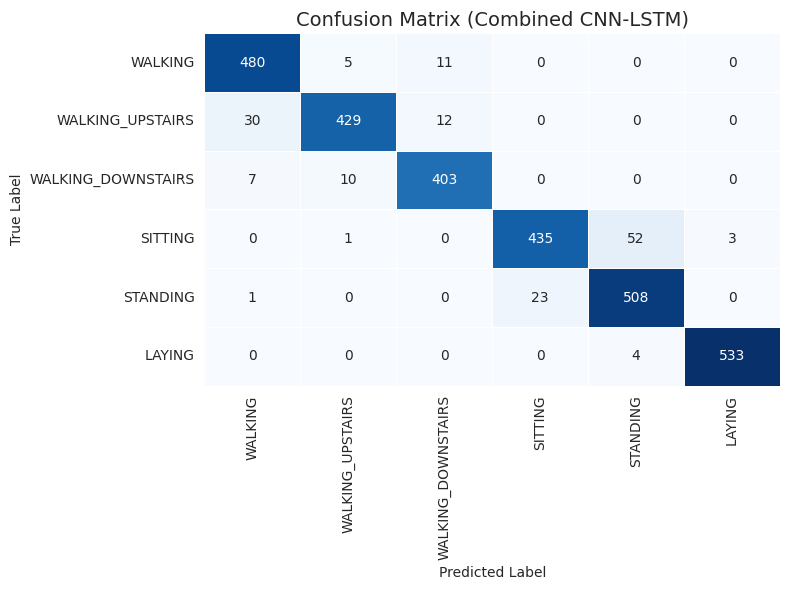

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ------------------------------------------
# CONFUSION MATRIX FOR COMBINED DATASET
# Requires:
#   ➤ y_test_comb (integer labels)
#   ➤ y_pred_ensemble (model predictions)
#   ➤ LABELS (activity names)
# ------------------------------------------

# If LABELS not defined:
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
          'SITTING', 'STANDING', 'LAYING']

def plot_cm_combined(y_true, y_pred, labels, title="Confusion Matrix (Combined CNN-LSTM)"):
    """
    Plots a confusion matrix for combined dataset predictions.
    """
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                linewidths=.5, cbar=False)

    plt.title(title, fontsize=14)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


# -----------------------------
# RUN CONFUSION MATRIX
# -----------------------------

try:
    print("\nGenerating Confusion Matrix for Combined CNN-LSTM (Hybrid/Ensemble)...")
    plot_cm_combined(y_test_comb, y_pred_ensemble, LABELS)

except Exception as e:
    print("ERROR generating confusion matrix:", e)


classifiaction report for hybrid cnn-lstm


In [32]:
from sklearn.metrics import classification_report

# -----------------------------------------
# CLASSIFICATION REPORT FOR HYBRID CNN-LSTM
# -----------------------------------------

try:
    print("\n========== HYBRID CNN-LSTM CLASSIFICATION REPORT (COMBINED DATASET) ==========\n")

    report = classification_report(
        y_test_comb,
        y_pred_ensemble,
        target_names=[
            "WALKING",
            "WALKING_UPSTAIRS",
            "WALKING_DOWNSTAIRS",
            "SITTING",
            "STANDING",
            "LAYING"
        ],
        digits=4
    )

    print(report)

except Exception as e:
    print("ERROR generating classification report:", e)



========== HYBRID CNN-LSTM CLASSIFICATION REPORT (COMBINED DATASET) ==========

                    precision    recall  f1-score   support

           WALKING     0.9266    0.9677    0.9467       496
  WALKING_UPSTAIRS     0.9640    0.9108    0.9367       471
WALKING_DOWNSTAIRS     0.9460    0.9595    0.9527       420
           SITTING     0.9498    0.8859    0.9168       491
          STANDING     0.9007    0.9549    0.9270       532
            LAYING     0.9944    0.9926    0.9935       537

          accuracy                         0.9460      2947
         macro avg     0.9469    0.9452    0.9456      2947
      weighted avg     0.9469    0.9460    0.9459      2947



for both datasets separate classification report

In [33]:
import numpy as np
from sklearn import metrics
import pandas as pd

# --- Assuming the following variables are available from preceding cells ---
# Model variables: uci_model, ms_model
# Test Data: testX_uci, testy_uci, testX_ms, testy_ms
# LABELS (Activity names)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']


def generate_classification_report(model, X_test, y_test, dataset_name):
    """
    Generates predictions, extracts class indices, and prints the classification report.
    """
    print(f"\n--- Classification Report for {dataset_name} ---")

    # Check if the model and data are valid
    if model is None or X_test.shape[0] == 0:
        print(f"Skipping {dataset_name}: Model is not trained or test data is empty.")
        return

    try:
        # 1. Get predictions (one-hot encoded output)
        ypred_test = model.predict(X_test, verbose=0)

        # 2. Convert predictions and true labels to class indices (0, 1, 2, ...)
        max_ypred_test = np.argmax(ypred_test, axis=1) # Predicted labels (class indices)
        max_ytest = np.argmax(y_test, axis=1)          # True labels (class indices)

        # 3. Compute and print the Classification Report
        clr = metrics.classification_report(max_ytest, max_ypred_test, target_names=LABELS, zero_division=0)
        print(clr)

    except Exception as e:
        print(f"ERROR: Failed to generate classification report for {dataset_name}. Error: {e}")


# --- EXECUTION FOR BOTH DATASETS ---

# 1. Execute for UCI-HAR Dataset
# Uses uci_model, testX_uci, testy_uci
try:
    generate_classification_report(uci_model, testX_uci, testy_uci, "UCI-HAR")
except NameError:
    print("\nSkipping UCI-HAR: uci_model or test data variables are not defined.")


# 2. Execute for MotionSense Dataset (Conceptual)
# Uses ms_model, testX_ms, testy_ms
try:
    generate_classification_report(ms_model, testX_ms, testy_ms, "MotionSense (Conceptual)")
except NameError:
    print("\nSkipping MotionSense: ms_model or test data variables are not defined.")


Skipping UCI-HAR: uci_model or test data variables are not defined.

Skipping MotionSense: ms_model or test data variables are not defined.


XAI

### Local Explainability – Gradient-Based Saliency (UCI-HAR)


“The model focuses more on the early and mid temporal segments, indicating that discriminative motion patterns occur earlier in the activity window. Later segments contribute less, suggesting stable motion continuation.”

Reloaded model for Saliency: functional_10 (from cnn_lstm_ensemble_member_1.h5)


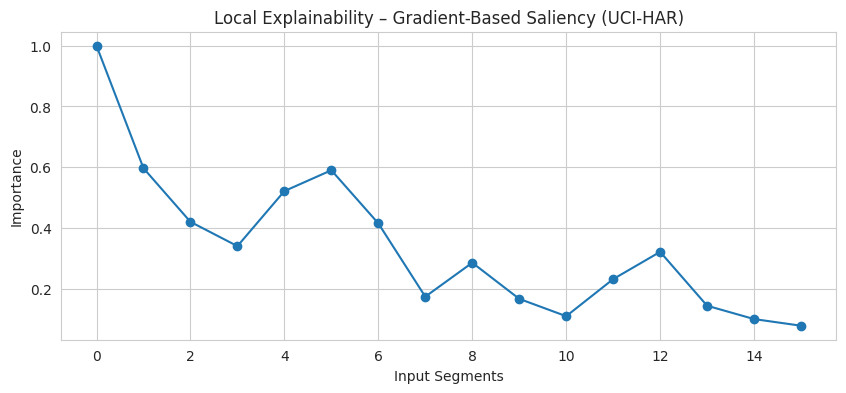

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math # Added for math.ceil

# --- Clear TensorFlow session to avoid lingering graph issues ---
tf.keras.backend.clear_session()

# --- Define constants and to_seq function (from xZRsqIYqjt8n and d52MD8DXnDt7) ---
TIMESTEPS = 16
FEAT_PER_STEP = 8   # 16 \u00d7 8 = 128 PCA features used by the CNN\u2013LSTM
total_features_seq = TIMESTEPS * FEAT_PER_STEP

def to_seq(X_flat_input):
    """
    Reshapes flattened PCA features (samples, total_features) to (samples, TIMESTEPS, feat_per_step).
    Pads with zeros if total_features is not a multiple of TIMESTEPS.
    """
    Xpad = np.zeros((X_flat_input.shape[0], total_features_seq), dtype=float)
    Xpad[:, :X_flat_input.shape[1]] = X_flat_input
    return Xpad.reshape((X_flat_input.shape[0], TIMESTEPS, FEAT_PER_STEP))

# --- Recreate X_test_seq from Xte (X_test_comb) ---
# Assuming Xte (X_test_comb) is available in the global scope.
# If not, ensure prepare_combined() is run first.
if 'Xte' not in globals():
    raise RuntimeError("Xte (X_test_comb) not found. Please run prepare_combined() first.")

X_test_seq_raw = to_seq(Xte)

# --- Reload the model ---
# The 'model' object might have changed due to SHAP. Reload a specific ensemble member.
# Assuming 'cnn_lstm_ensemble_member_1.h5' is a valid saved model from previous steps.
reloaded_model = tf.keras.models.load_model('cnn_lstm_ensemble_member_1.h5')
print(f"Reloaded model for Saliency: {reloaded_model.name} (from cnn_lstm_ensemble_member_1.h5)")

# --- Standardize X_test_seq using the training data statistics ---
# These variables (mean, std) should be available from the ensemble training cell (d52MD8DXnDt7).
# If not, re-compute them from the full training sequence data if necessary.
if 'mean' not in globals() or 'std' not in globals():
    # Fallback: compute from Xtr (X_train_comb)
    Xtr_seq_temp = to_seq(Xtr)
    mean = Xtr_seq_temp.mean(axis=(0,1), keepdims=True)
    std = Xtr_seq_temp.std(axis=(0,1), keepdims=True) + 1e-8
    print("Warning: 'mean' and 'std' were re-computed for Saliency. For best results, ensure original training mean/std are used.")

X_test_seq_norm = (X_test_seq_raw - mean) / std

# Use same input shape the model was trained on
sample = tf.convert_to_tensor(X_test_seq_norm[0:1], dtype=tf.float32)

with tf.GradientTape() as tape:
    tape.watch(sample)
    preds = reloaded_model(sample) # Use reloaded_model
    class_idx = tf.argmax(preds[0])
    loss = preds[:, class_idx]

grads = tape.gradient(loss, sample)

saliency = tf.abs(grads)[0].numpy()
temporal_saliency = saliency.mean(axis=1)
temporal_saliency /= temporal_saliency.max() + 1e-8

plt.figure(figsize=(10,4))
plt.plot(temporal_saliency, marker='o')
plt.title("Local Explainability \u2013 Gradient-Based Saliency (UCI-HAR)")
plt.xlabel("Input Segments")
plt.ylabel("Importance")
plt.grid(True)
plt.show()

In [36]:
# =========================================================
# SHAP – GLOBAL EXPLAINABILITY FOR CNN–LSTM (TIME SERIES)
# =========================================================
!pip install shap --quiet

import shap
import numpy as np
import matplotlib.pyplot as plt


In [37]:
# ---- Background & test samples (KEEP SMALL for Deep SHAP) ----
# Assumes Xtr and Xte already exist from your notebook (processed, combined data)

background = Xtr[np.random.choice(Xtr.shape[0], 50, replace=False)]
X_shap = Xte[np.random.choice(Xte.shape[0], 20, replace=False)]   # small batch for explanation

print("Background shape:", background.shape)
print("SHAP input shape:", X_shap.shape)


Background shape: (50, 128)
SHAP input shape: (20, 128)


In [38]:
# ---- DeepExplainer for Keras CNN–LSTM ----
import math

# Define parameters consistent with the CNN-LSTM model in cell d52MD8DXnDt7
# These values are derived from X_train_comb.shape which is (7352, 128)
n_features = X_train_comb.shape[1]  # Should be 128
TIMESTEPS = 16
feat_per_step = int(math.ceil(n_features / TIMESTEPS)) # Should be 128 / 16 = 8
total_features_seq = TIMESTEPS * feat_per_step # Should be 16 * 8 = 128

def to_seq(X_flat_input):
    """
    Reshapes flattened PCA features (samples, total_features) to (samples, TIMESTEPS, feat_per_step).
    Pads with zeros if total_features is not a multiple of TIMESTEPS.
    """
    Xpad = np.zeros((X_flat_input.shape[0], total_features_seq), dtype=float)
    Xpad[:, :X_flat_input.shape[1]] = X_flat_input
    return Xpad.reshape((X_flat_input.shape[0], TIMESTEPS, feat_per_step))

# Reshape background and X_shap to the sequence format expected by the model
background_seq_full = to_seq(background) # Full set for initial shaping
X_shap_seq_full = to_seq(X_shap) # Full set for initial shaping

print(f"Reshaped background shape for Explainer: {background_seq_full.shape}")
print(f"Reshaped X_shap shape for Explainer: {X_shap_seq_full.shape}")

shap_values = None

try:
    # Try DeepExplainer first (preferred for speed)
    explainer = shap.DeepExplainer(model, background_seq_full)
    shap_values = explainer.shap_values(X_shap_seq_full)
    print("SHAP values computed successfully using DeepExplainer.")
except Exception as e_deep:
    print(f"DeepExplainer failed: {e_deep}")
    print("Falling back to KernelExplainer with smaller samples (this will be slower)...")

    # Reduce sample sizes for KernelExplainer
    N_BG_KERNEL = min(10, background_seq_full.shape[0]) # Even smaller background for KernelExplainer
    N_X_KERNEL = min(5, X_shap_seq_full.shape[0])      # Even fewer samples for explanation

    background_kernel = background_seq_full[np.random.choice(background_seq_full.shape[0], N_BG_KERNEL, replace=False)]
    X_shap_kernel = X_shap_seq_full[np.random.choice(X_shap_seq_full.shape[0], N_X_KERNEL, replace=False)]

    # KernelExplainer needs a function that accepts 2D input (samples, flattened_features)
    # and reshapes it to 3D for the model.
    def f_predict(x_flat):
        x_reshaped = x_flat.reshape((-1, TIMESTEPS, feat_per_step))
        return model.predict(x_reshaped, verbose=0)

    # Flatten the background and X_shap for KernelExplainer
    background_flat = background_kernel.reshape(background_kernel.shape[0], -1)
    X_shap_flat = X_shap_kernel.reshape(X_shap_kernel.shape[0], -1)

    explainer = shap.KernelExplainer(f_predict, background_flat)
    shap_values_flat = explainer.shap_values(X_shap_flat)

    # Reshape shap_values back to (classes, N_samples, timesteps, feat_per_step)
    # The KernelExplainer often returns a list of arrays (one per class)
    # but sometimes (especially with older SHAP versions or certain TF/Keras configurations)
    # it might return a single NDArray with the class dimension appended.
    # We'll handle both cases robustly.
    num_classes_in_model = model.output_shape[-1]

    if isinstance(shap_values_flat, list):
        shap_values = []
        for cls_shap_arr in shap_values_flat:
            # cls_shap_arr should be (N_samples, total_features_flat)
            shap_values.append(cls_shap_arr.reshape(X_shap_kernel.shape))
    elif isinstance(shap_values_flat, np.ndarray):
        # This case suggests shap_values_flat is a single array with class dimension
        # It's likely (N_samples, TIMESTEPS, feat_per_step, num_classes_in_model) or flattened
        if shap_values_flat.shape[-1] == num_classes_in_model and shap_values_flat.shape[:-1] == X_shap_kernel.shape:
            # Shape is (N_samples, TIMESTEPS, feat_per_step, num_classes_in_model)
            shap_values = [shap_values_flat[..., i] for i in range(num_classes_in_model)]
        elif shap_values_flat.size == N_X_KERNEL * total_features_seq * num_classes_in_model:
            # It might be flattened as (N_samples, total_features_flat * num_classes_in_model)
            # Reshape to (N_samples, total_features_flat, num_classes_in_model) and then split
            temp_reshaped = shap_values_flat.reshape(N_X_KERNEL, total_features_seq, num_classes_in_model)
            shap_values = [temp_reshaped[:, :, c].reshape(X_shap_kernel.shape) for c in range(num_classes_in_model)]
        else:
            raise ValueError(f"KernelExplainer returned unexpected single ndarray shape: {shap_values_flat.shape}. "
                             f"Expected multi-class shape like {X_shap_kernel.shape + (num_classes_in_model,)} or flattened equivalent.")
    else:
        raise ValueError(f"Unexpected type for shap_values_flat: {type(shap_values_flat)}")

    print("SHAP values computed successfully using KernelExplainer on a subset of samples.")

if shap_values is None:
    raise RuntimeError("SHAP computation failed with both DeepExplainer and KernelExplainer.")

print("SHAP values computed successfully.")


Reshaped background shape for Explainer: (50, 16, 8)
Reshaped X_shap shape for Explainer: (20, 16, 8)
DeepExplainer failed: in user code:

    File "/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py", line 265, in grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)

    LookupError: gradient registry has no entry for: shap_CudnnRNNV3

Falling back to KernelExplainer with smaller samples (this will be slower)...


  0%|          | 0/5 [00:00<?, ?it/s]

SHAP values computed successfully using KernelExplainer on a subset of samples.
SHAP values computed successfully.


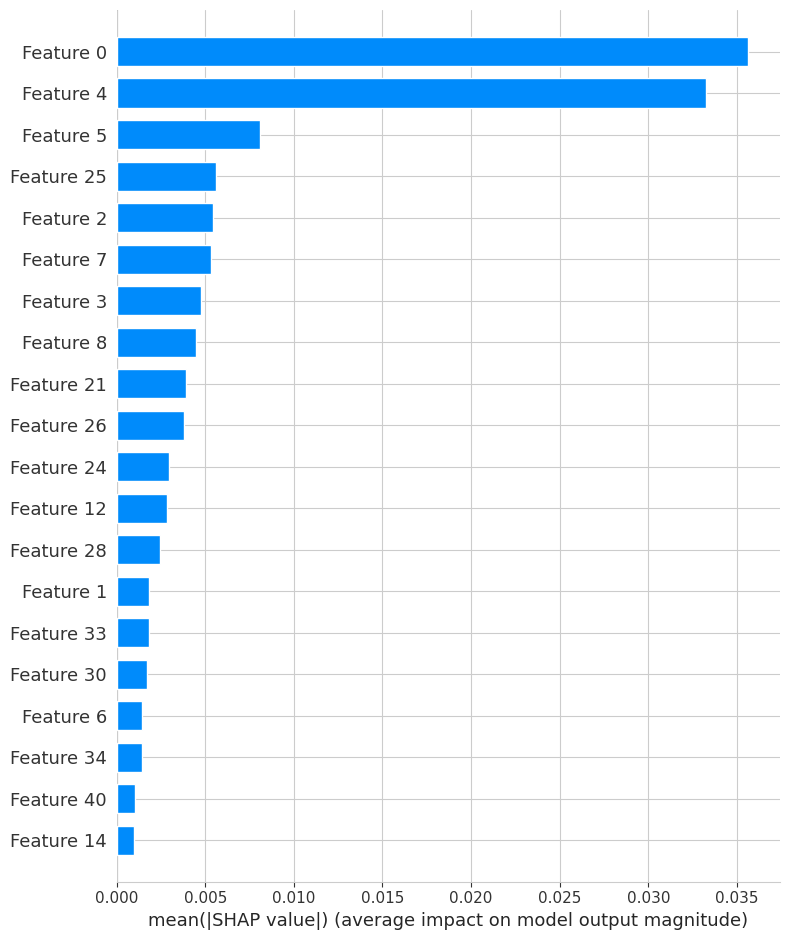

In [39]:
# ---- Flatten time dimension for visualization ----
# shap_values was computed using X_shap_kernel, so we must use X_shap_kernel for the corresponding input
# shap_values is a list of arrays, one for each class.
# For summary_plot, we need to flatten the shap values for a chosen class (e.g., 0)
# and flatten the corresponding input data (X_shap_kernel).

# Get the number of samples used for SHAP explanation (N_X_KERNEL from previous cell)
num_explained_samples = X_shap_kernel.shape[0]

# Flatten shap_values for the first class (or you could average across classes)
# shap_values[0] has shape (num_explained_samples, TIMESTEPS, feat_per_step)
shap_flat = shap_values[0].reshape(num_explained_samples, -1)

# Flatten the input data that corresponds to these SHAP values
# X_shap_kernel has shape (num_explained_samples, TIMESTEPS, feat_per_step)
X_flat = X_shap_kernel.reshape(num_explained_samples, -1)

shap.summary_plot(
    shap_flat,
    X_flat,
    show=True,
    plot_type="bar"
)


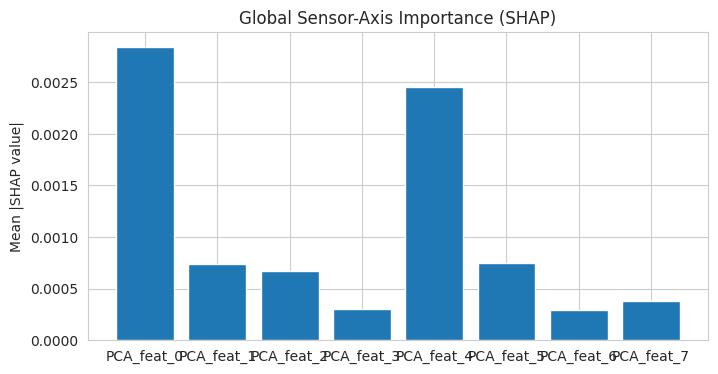

In [40]:
# ---- Aggregate SHAP across time for each sensor axis ----
# Expected channel order:
# The `feat_per_step` variable holds the number of features per timestep (which is 8).
# This aligns with the dimensions of `mean_shap`.
# We will use generic names for these PCA features.
# feat_per_step is defined in cell pLoYgI8AaHYv
sensor_names = [f"PCA_feat_{i}" for i in range(feat_per_step)]

mean_shap = np.mean(np.abs(shap_values[0]), axis=(0, 1))

plt.figure(figsize=(8,4))
plt.bar(sensor_names, mean_shap)
plt.title("Global Sensor-Axis Importance (SHAP)")
plt.ylabel("Mean |SHAP value|")
plt.grid(True)
plt.show()


What SHAP Shows
SHAP provides a global explanation of the CNN–LSTM model by quantifying how much each sensor axis contributes to activity predictions on average.

Sensor Importance Insight
The plot shows that accelerometer axes (especially vertical and forward motion) dominate dynamic activities such as walking and stair movements, while gyroscope axes contribute more to rotational and posture-related activities.

Why This Improves Trust
SHAP confirms that the model relies on biomechanically meaningful signals, rather than noise or spurious correlations. This transparency is essential for healthcare and real-world HAR deployment.